# Efficiencies for QCD background and ZH signals for HLT_Mu17_Photon30 and different kinematical cuts

## Imports & reading

In [1]:
# imports

import itertools
import numpy as np
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.CMS])
QCD_color, Z_color, H_color = ["#af272f", "#608fbe", "darkorange"]

mainblue = ["#42719f", "#6ab4ff"]
coralgreen = ["#117a65", "#138D75"]
reddish = ["#c82929", "#e42f2f"]
orangish = ["#d78939", "#e48a2f"]
blueish = ["#4387cb", "#2f89e4"]

from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

QCD_events = NanoEventsFactory.from_root('data.nosync/QCD_Pt-30_MuEnrichedPt4_TuneCP5_13TeV_pythia8_RunIISummer20UL16.root/QCD_Pt-30_MuEnrichedPt4_Mu10_Photon15.root', schemaclass = NanoAODSchema.v7, treepath='mergedEvents').events()
Z_events = NanoEventsFactory.from_root('data.nosync/ZToJPsiG_JPsiToMuMu_TuneCP5_13TeV-madgraph-pythia8_RunIISummer20UL16/ZToJPsiG_JPsiToMuMu_Mu10_Photon15.root', schemaclass = NanoAODSchema.v7, treepath='mergedEvents').events()
H_events = NanoEventsFactory.from_root('data.nosync/GluGluToH_HToJPsiG_JPsiToMuMu_TuneCP5_13TeV-madgraph-pythia8_RunIISummer20UL16/GluGluToH_HToJPsiG_JPsiToMuMu_Mu10_Photon15.root', schemaclass = NanoAODSchema.v7, treepath='mergedEvents').events()


# N events of the whole datasets
Ntot_QCD_events = 21335910 # total of events in the whole of the 16 QCD files
Ntot_Z_events = 459000 # total of events in the whole of the 6 Z boson files
Ntot_H_events = 448000 # total of events in the whole of the 10 H boson files

/usr/local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for Electron_jetIdx => Jet
  warnings.warn(
/usr/local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for Electron_photonIdx => Photon
  warnings.warn(
/usr/local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx1 => SubJet
  warnings.warn(
/usr/local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx2 => SubJet
  warnings.warn(
/usr/local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FsrPhoton_muonIdx => Muon
  warnings.warn(
/usr/local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index

## Efficiency of HLT_Mu17_Photon30 for QCD background

In [2]:
# thresholds
thMuon = 18.
thPhoton = 32.

# masks
QCD_mask_kin = (QCD_events.Muon1.pt > thMuon) & (QCD_events.Photon1.pt > thPhoton)
QCD_mask_HLT = (QCD_events.HLT.Mu17_Photon30_CaloIdL_L1ISO == True)

# kin and HLT mask
QCD_mask_kin_HLT = QCD_mask_kin & QCD_mask_HLT

# print info
print("Total events passing the pre-selection:", len(QCD_events.Muon1.pt))
print("Events passing the 18 and 32 GeV cut:",  ak.sum(QCD_mask_kin))
print("Total events passing the HLT:", ak.sum(QCD_mask_HLT))
print("Total events passing the cuts AND the HLT:", ak.sum(QCD_mask_kin_HLT))

print("\n")

# efficiency of trigger
QCD_eff_trigger = ak.sum(QCD_mask_kin_HLT) / ak.sum(QCD_mask_kin) * 100 
print("QCD trigger efficiency (HLT_Mu17_Photon30): %i/%i = %.2f%%" % (ak.sum(QCD_mask_kin_HLT), ak.sum(QCD_mask_kin), (QCD_eff_trigger)))

# efficiency of selection
QCD_eff_selection =  ak.sum(QCD_mask_kin) / Ntot_QCD_events * 100
print("QCD selection efficiency: %i/%i = %.5f%%" % (ak.sum(QCD_mask_kin), Ntot_QCD_events, QCD_eff_selection))

Total events passing the pre-selection: 527
Events passing the 18 and 32 GeV cut: 34
Total events passing the HLT: 34
Total events passing the cuts AND the HLT: 26


QCD trigger efficiency (HLT_Mu17_Photon30): 26/34 = 76.47%
QCD selection efficiency: 34/21335910 = 0.00016%


## Efficiency of HLT_Mu17_Photon30 for Z signal

In [3]:
# thresholds
thMuon = 18.
thPhoton = 32.

# masks
Z_mask_kin = (Z_events.Muon1.pt > thMuon) & (Z_events.Photon1.pt > thPhoton)
Z_mask_HLT = (Z_events.HLT.Mu17_Photon30_CaloIdL_L1ISO == True)

# kin and HLT mask
Z_mask_kin_HLT = Z_mask_kin & Z_mask_HLT

# print info
print("Total events passing the pre-selection:", len(Z_events.Muon1.pt))
print("Events passing the 18 and 32 GeV cut:",  ak.sum(Z_mask_kin))
print("Total events passing the HLT:", ak.sum(Z_mask_HLT))
print("Total events passing the cuts AND the HLT:", ak.sum(Z_mask_kin_HLT))

print("\n")

# efficiency of trigger
Z_eff_trigger = ak.sum(Z_mask_kin_HLT) / ak.sum(Z_mask_kin) * 100 
print("QCD trigger efficiency (HLT_Mu17_Photon30): %i/%i = %.2f%%" % (ak.sum(Z_mask_kin_HLT), ak.sum(Z_mask_kin), (Z_eff_trigger)))

# efficiency of selection
Z_eff_selection =  ak.sum(Z_mask_kin) / Ntot_Z_events * 100
print("QCD selection efficiency: %i/%i = %.5f%%" % (ak.sum(Z_mask_kin), Ntot_Z_events, Z_eff_selection))

Total events passing the pre-selection: 137497
Events passing the 18 and 32 GeV cut: 98630
Total events passing the HLT: 87263
Total events passing the cuts AND the HLT: 81829


QCD trigger efficiency (HLT_Mu17_Photon30): 81829/98630 = 82.97%
QCD selection efficiency: 98630/459000 = 21.48802%


## Efficiency of HLT_Mu17_Photon30 for H signal

In [4]:
# thresholds
thMuon = 18.
thPhoton = 32.

# masks
H_mask_kin = (H_events.Muon1.pt > thMuon) & (H_events.Photon1.pt > thPhoton)
H_mask_HLT = (H_events.HLT.Mu17_Photon30_CaloIdL_L1ISO == True)

# kin and HLT mask
H_mask_kin_HLT = H_mask_kin & H_mask_HLT

# print info
print("Total events passing the pre-selection:", len(H_events.Muon1.pt))
print("Events passing the 18 and 32 GeV cut:",  ak.sum(H_mask_kin))
print("Total events passing the HLT:", ak.sum(H_mask_HLT))
print("Total events passing the cuts AND the HLT:", ak.sum(H_mask_kin_HLT))

print("\n")

# efficiency of trigger
H_eff_trigger = ak.sum(H_mask_kin_HLT) / ak.sum(H_mask_kin) * 100 
print("QCD trigger efficiency (HLT_Mu17_Photon30): %i/%i = %.2f%%" % (ak.sum(H_mask_kin_HLT), ak.sum(H_mask_kin), (H_eff_trigger)))

# efficiency of selection
H_eff_selection =  ak.sum(H_mask_kin) / Ntot_H_events * 100
print("QCD selection efficiency: %i/%i = %.5f%%" % (ak.sum(H_mask_kin), Ntot_H_events, H_eff_selection))

Total events passing the pre-selection: 179556
Events passing the 18 and 32 GeV cut: 160587
Total events passing the HLT: 144804
Total events passing the cuts AND the HLT: 142102


QCD trigger efficiency (HLT_Mu17_Photon30): 142102/160587 = 88.49%
QCD selection efficiency: 160587/448000 = 35.84531%


## Individual plots

### Plots QCD

Passing from 527 preselected events to 26 filtered events after HLT trigger AND selection cuts (4.93%)


Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV: 35
Events that satisfy 70 < m(ZH) < 150 GeV: 123
Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV AND 70 < m(ZH) < 150 GeV: 7


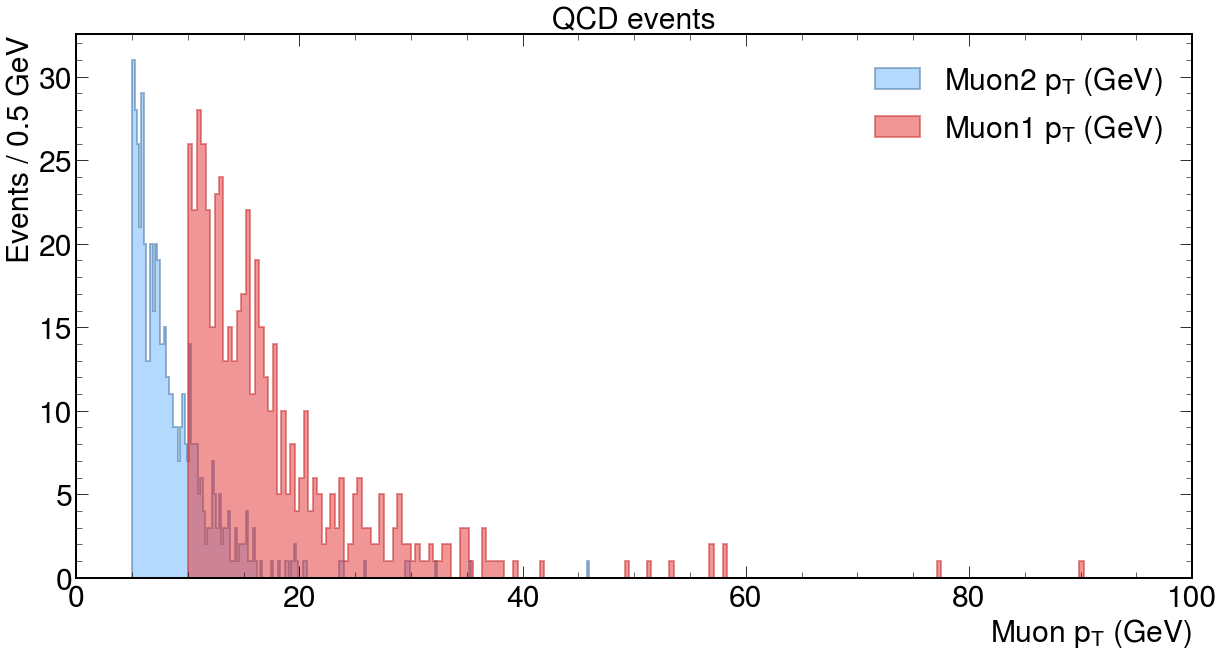

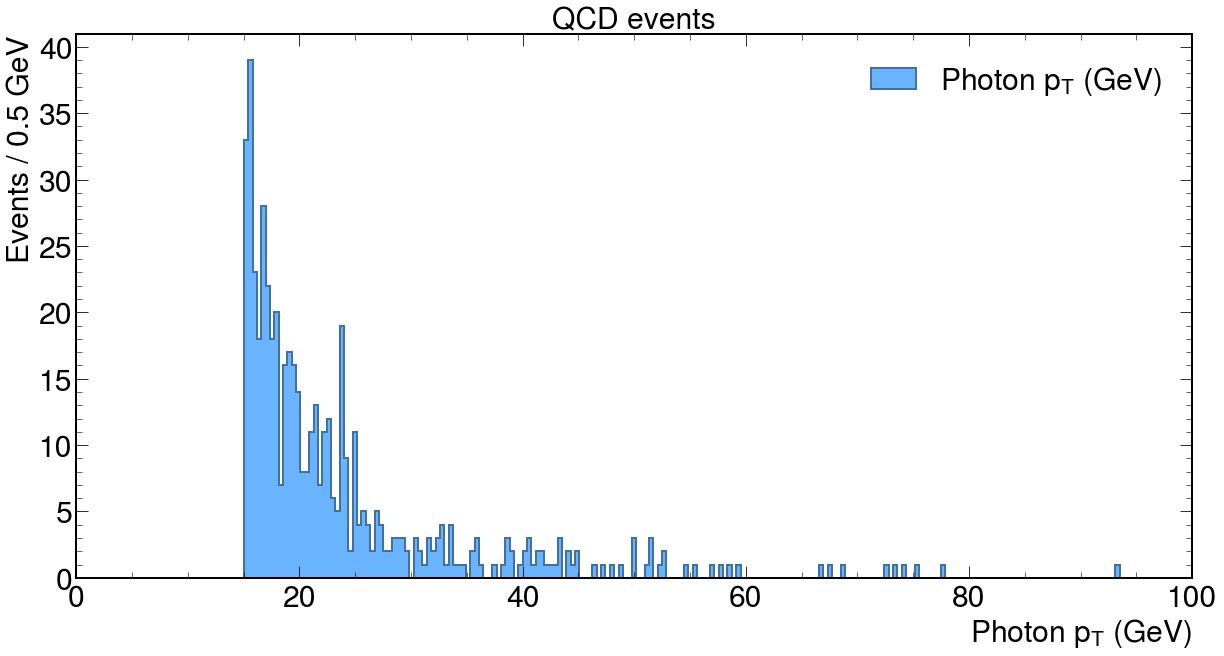

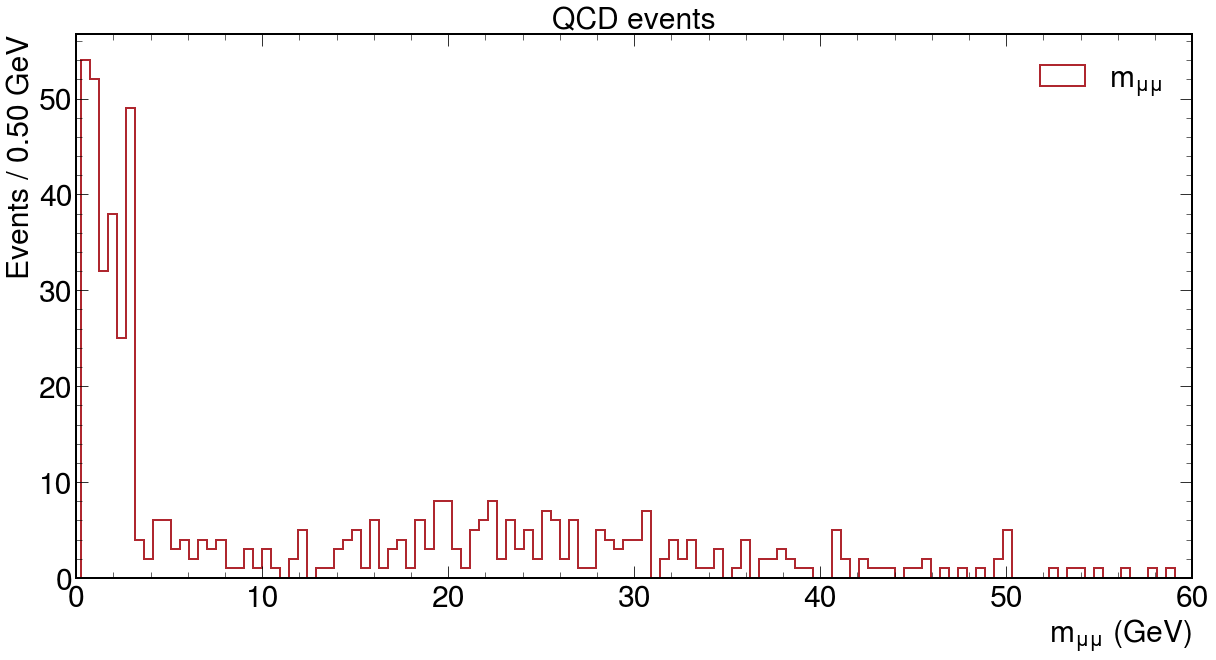

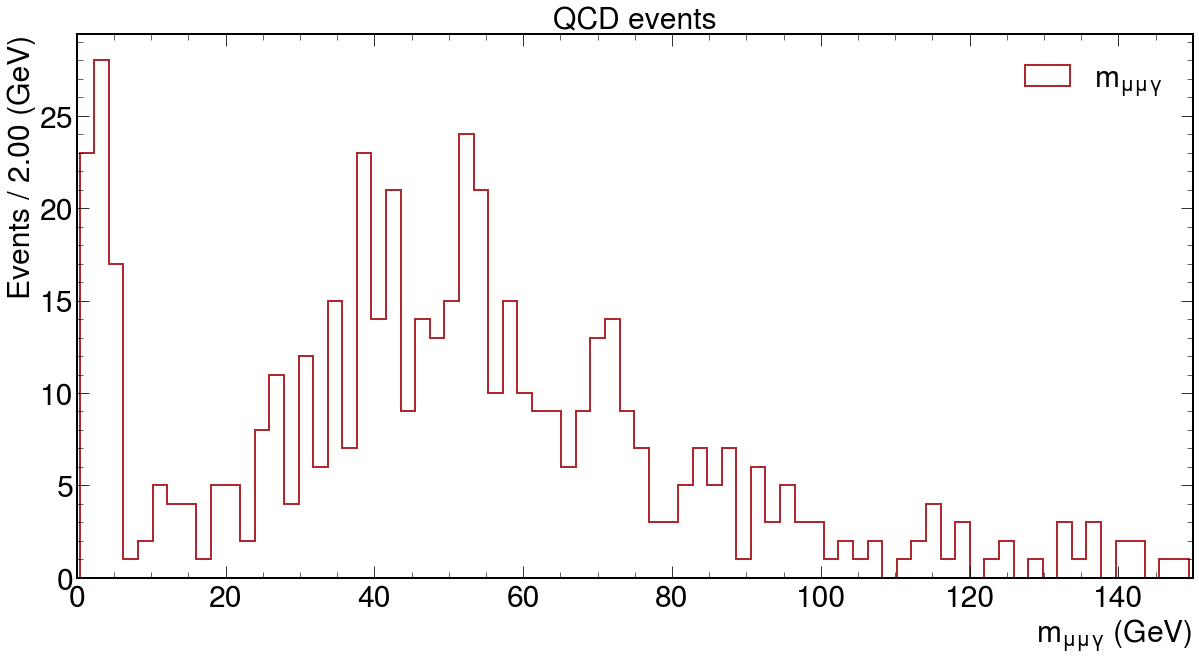

In [5]:
# selected muons, photons, JPsi and HZ
selectedMuon1 = QCD_events.Muon1
selectedMuon2 = QCD_events.Muon2
selectedPhoton1 = QCD_events.Photon1
selectedJPsi = QCD_events.JPsi
selectedHorZ = QCD_events.HorZ

# info on cuts
print("Passing from %i preselected events to %i filtered events after HLT trigger AND selection cuts (%.2f%%)" % (len(QCD_events), ak.sum(QCD_mask_kin_HLT), ak.sum(QCD_mask_kin_HLT) / len(QCD_events) * 100))

# info on mass cuts
print("\n")
print("Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV:", len(selectedJPsi.mass[(selectedJPsi.mass > 3) & (selectedJPsi.mass < 3.2)]))
print("Events that satisfy 70 < m(ZH) < 150 GeV:", len(selectedHorZ.mass[(selectedHorZ.mass > 70.) & (selectedHorZ.mass < 150.)]))
print("Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV AND 70 < m(ZH) < 150 GeV:", len(selectedHorZ.mass[(selectedJPsi.mass > 3) & (selectedJPsi.mass < 3.2) & (selectedHorZ.mass > 70.) & (selectedHorZ.mass < 150.)]))



'''
Muons
'''
_min = 0
_max = 100 # ak.max(selectedMuon1.pt)
width = .5 # GeV
nbins = int(round((_max - _min) / width)) + 1

_muon1_pt =  ak.flatten(selectedMuon1.pt[(selectedMuon1.pt > _min) & (selectedMuon1.pt < _max)], axis = None)
_muon2_pt =  ak.flatten(selectedMuon2.pt[(selectedMuon2.pt > _min) & (selectedMuon2.pt < _max)], axis = None)

fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _muon2_pt,
    bins = nbins,
    histtype = 'stepfilled',
    ec = mainblue[0],
    facecolor = mainblue[1],
    alpha = .5,
    lw = 2.,
    label = r"Muon2 $p_{T}$ (GeV)"
)
ax.hist(
    _muon1_pt,
    bins = nbins,
    histtype = 'stepfilled',
    ec = reddish[0],
    facecolor = reddish[1],
    alpha = .5,
    lw = 2.,
    label = r"Muon1 $p_{T}$ (GeV)"
)
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("Muon $p_{T}$ (GeV)", fontsize = 30)
ax.set_ylabel("Events / %.1f GeV" % width, fontsize = 30)
ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("QCD events", fontsize = 30)
plt.savefig("plots/muonPt/muonPt_QCD.pdf")





'''
Photons
'''
_min = 0
_max = 100 # ak.max(selectedPhoton1.pt)
width = .5 # GeV
nbins = int(round((_max - _min) / width)) + 1

_photon1_pt =  ak.flatten(selectedPhoton1.pt[(selectedPhoton1.pt > _min) & (selectedPhoton1.pt < _max)], axis = None)

fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _photon1_pt,
    bins = nbins,
    histtype = 'stepfilled',
    ec = mainblue[0],
    facecolor = mainblue[1],
    alpha = 1.,
    lw = 2.,
    label = r"Photon $p_{T}$ (GeV)"
)
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("Photon $p_{T}$ (GeV)", fontsize = 30)
ax.set_ylabel("Events / %.1f GeV" % width, fontsize = 30)
ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("QCD events", fontsize = 30)
plt.savefig("plots/photonPt/photonPt_QCD.pdf")





'''
Invariant mumu mass
'''
_min = 0
_max = 60 # ak.max(selectedJPsi.mass)
width = .5 # GeV
nbins = int(round((_max - _min) / width)) + 1

_JPsi_mass =  ak.flatten(selectedJPsi.mass[(selectedJPsi.mass > _min) & (selectedJPsi.mass < _max)], axis = None)


fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _JPsi_mass, 
    bins = nbins,
    histtype = 'stepfilled',
    ec = QCD_color,
    facecolor = "none",
    alpha = 1.,
    lw = 2.,
    label = r"$m_{\mu \mu}$"
)
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("$m_{\mu \mu}\ ({\\rm GeV})$", fontsize = 30)
ax.set_ylabel("Events / %.2f GeV" % width, fontsize = 30)
ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("QCD events", fontsize = 30)
plt.savefig("plots/m_mumu/m_mumu_QCD.pdf")





'''
Invariant mumuG mass
'''
_min = 0
_max = 150 # ak.max(selectedHorZ.mass) + 10
width = 2 # GeV
nbins = int(round((_max - _min) / width)) + 1

_HorZ_mass =  ak.flatten(selectedHorZ.mass[(selectedHorZ.mass > _min) & (selectedHorZ.mass < _max)], axis = None)


fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _HorZ_mass, 
    bins = nbins,
    histtype = 'stepfilled',
    ec = QCD_color,
    facecolor = "none",
    alpha = 1.,
    lw = 2.,
    label = r"$m_{\mu \mu \gamma}$"
)
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("$m_{\mu \mu \gamma}\ ({\\rm GeV})$", fontsize = 30)
ax.set_ylabel("Events / %.2f (GeV)" % width, fontsize = 30)
ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("QCD events", fontsize = 30)
plt.savefig("plots/m_mumuG/m_mumuG_QCD.pdf")

### Plots Z boson

Passing from 137497 preselected events to 81829 filtered events after HLT trigger AND selection cuts (59.51%)


Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV: 126968
Events that satisfy 70 < m(ZH) < 150 GeV: 136183
Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV AND 70 < m(ZH) < 150 GeV: 126025


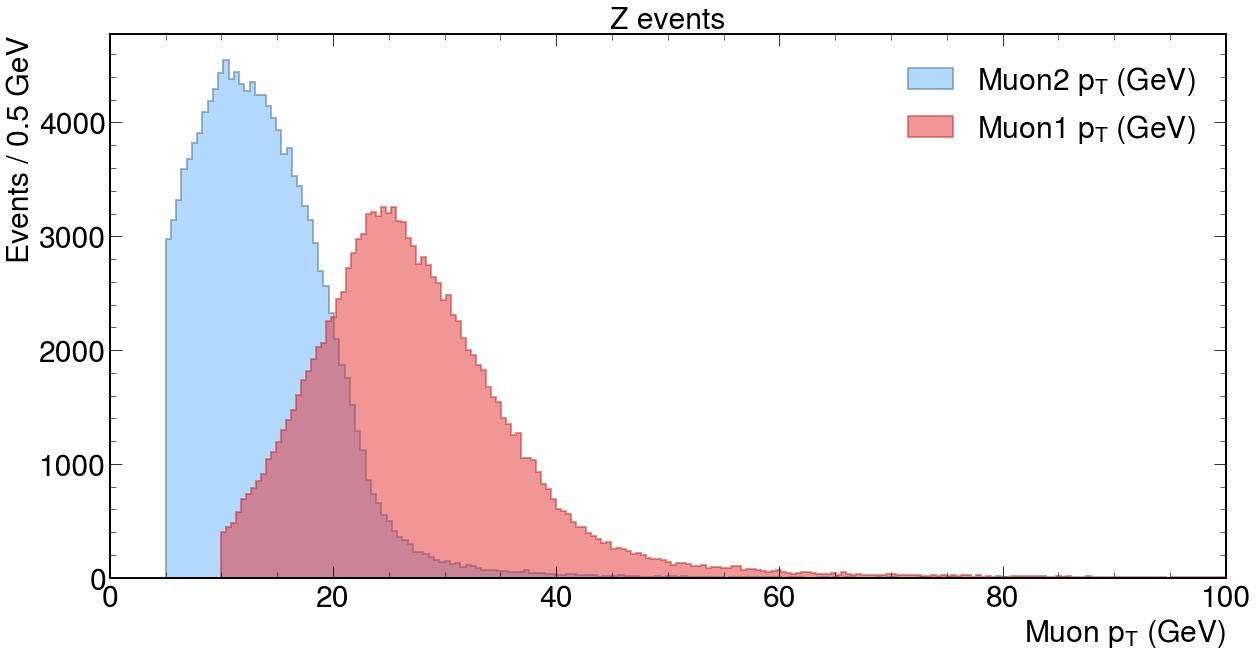

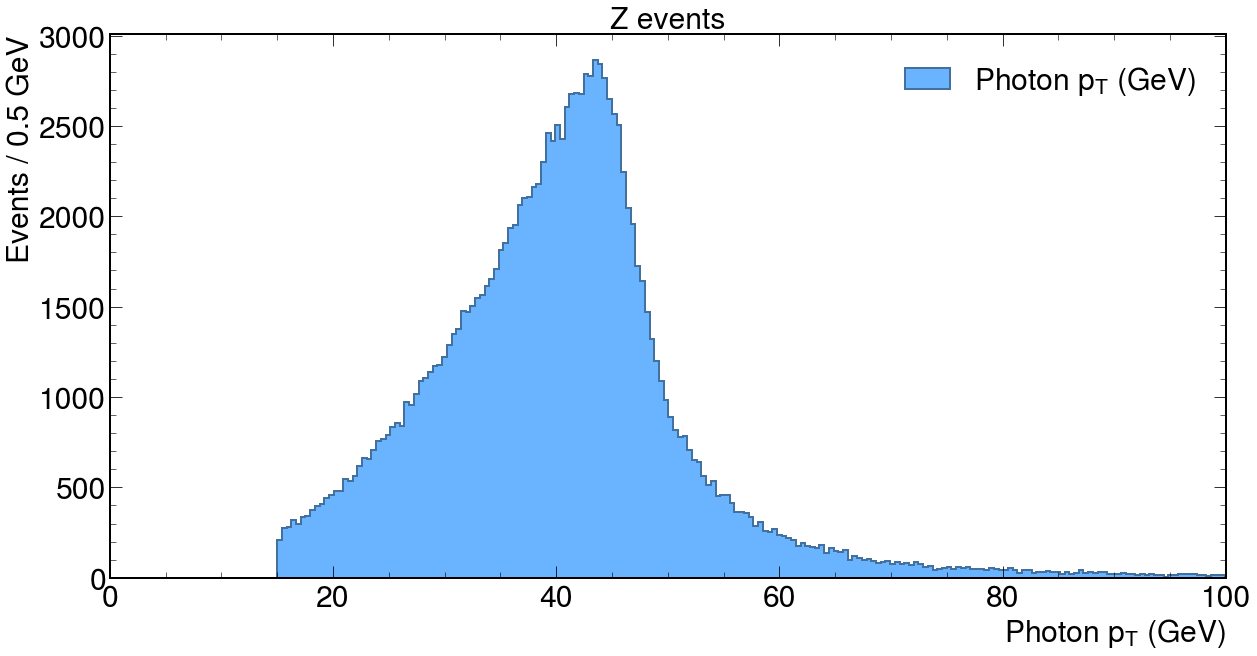

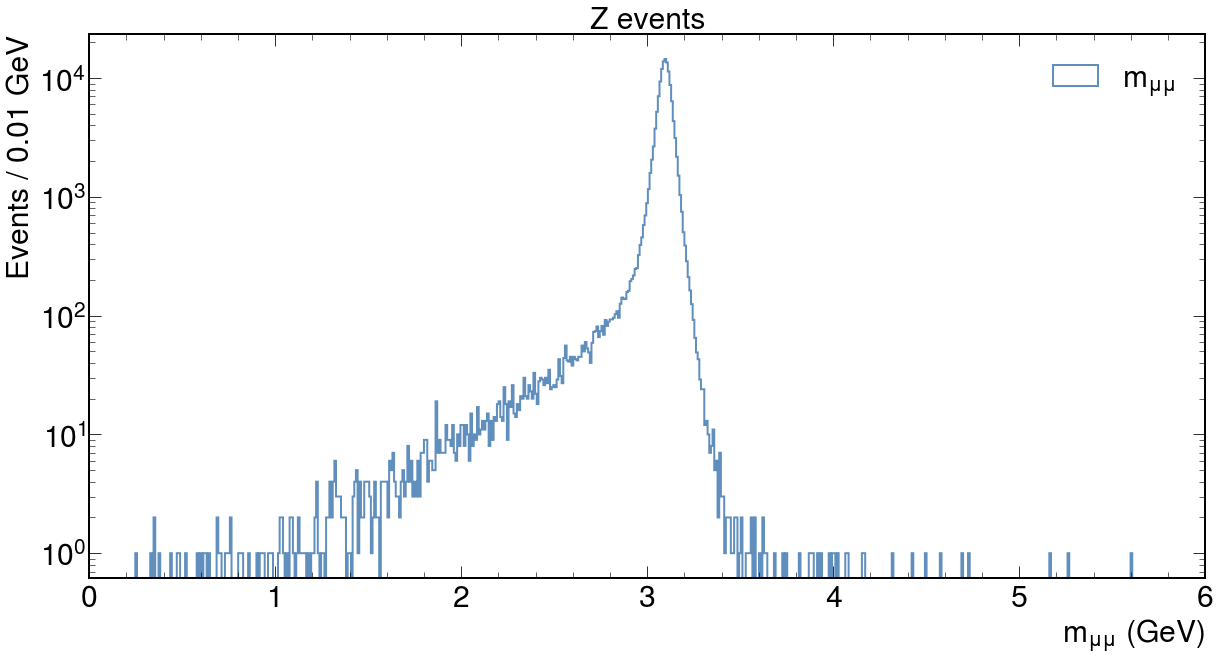

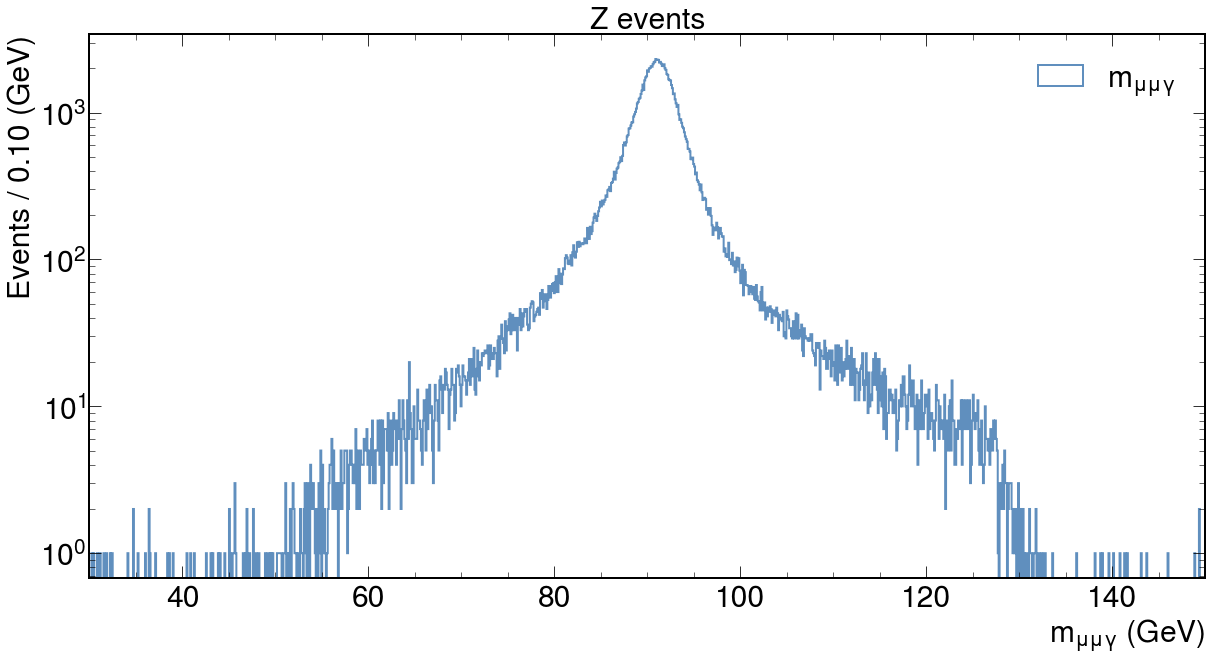

In [6]:
# selected muons, photons, JPsi and HZ
selectedMuon1 = Z_events.Muon1
selectedMuon2 = Z_events.Muon2
selectedPhoton1 = Z_events.Photon1
selectedJPsi = Z_events.JPsi
selectedHorZ = Z_events.HorZ

# info on cuts
print("Passing from %i preselected events to %i filtered events after HLT trigger AND selection cuts (%.2f%%)" % (len(Z_events), ak.sum(Z_mask_kin_HLT), ak.sum(Z_mask_kin_HLT) / len(Z_events) * 100))

# info on mass cuts
print("\n")
print("Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV:", len(selectedJPsi.mass[(selectedJPsi.mass > 3) & (selectedJPsi.mass < 3.2)]))
print("Events that satisfy 70 < m(ZH) < 150 GeV:", len(selectedHorZ.mass[(selectedHorZ.mass > 70.) & (selectedHorZ.mass < 150.)]))
print("Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV AND 70 < m(ZH) < 150 GeV:", len(selectedHorZ.mass[(selectedJPsi.mass > 3) & (selectedJPsi.mass < 3.2) & (selectedHorZ.mass > 70.) & (selectedHorZ.mass < 150.)]))



'''
Muons
'''
_min = 0
_max = 100 # ak.max(selectedMuon1.pt)
width = .5 # GeV
nbins = int(round((_max - _min) / width)) + 1

_muon1_pt =  ak.flatten(selectedMuon1.pt[(selectedMuon1.pt > _min) & (selectedMuon1.pt < _max)], axis = None)
_muon2_pt =  ak.flatten(selectedMuon2.pt[(selectedMuon2.pt > _min) & (selectedMuon2.pt < _max)], axis = None)

fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _muon2_pt,
    bins = nbins,
    histtype = 'stepfilled',
    ec = mainblue[0],
    facecolor = mainblue[1],
    alpha = .5,
    lw = 2.,
    label = r"Muon2 $p_{T}$ (GeV)"
)
ax.hist(
    _muon1_pt,
    bins = nbins,
    histtype = 'stepfilled',
    ec = reddish[0],
    facecolor = reddish[1],
    alpha = .5,
    lw = 2.,
    label = r"Muon1 $p_{T}$ (GeV)"
)
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("Muon $p_{T}$ (GeV)", fontsize = 30)
ax.set_ylabel("Events / %.1f GeV" % width, fontsize = 30)
ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("Z events", fontsize = 30)
plt.savefig("plots/muonPt/muonPt_Z.pdf")





'''
Photons
'''
_min = 0
_max = 100 # ak.max(selectedPhoton1.pt)
width = .5 # GeV
nbins = int(round((_max - _min) / width)) + 1

_photon1_pt =  ak.flatten(selectedPhoton1.pt[(selectedPhoton1.pt > _min) & (selectedPhoton1.pt < _max)], axis = None)

fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _photon1_pt,
    bins = nbins,
    histtype = 'stepfilled',
    ec = mainblue[0],
    facecolor = mainblue[1],
    alpha = 1.,
    lw = 2.,
    label = r"Photon $p_{T}$ (GeV)"
)
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("Photon $p_{T}$ (GeV)", fontsize = 30)
ax.set_ylabel("Events / %.1f GeV" % width, fontsize = 30)
ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("Z events", fontsize = 30)
plt.savefig("plots/photonPt/photonPt_Z.pdf")





'''
Invariant mumu mass
'''
_min = 0
_max = 6 # ak.max(selectedJPsi.mass)
width = .01 # GeV
nbins = int(round((_max - _min) / width)) + 1

_JPsi_mass =  ak.flatten(selectedJPsi.mass[(selectedJPsi.mass > _min) & (selectedJPsi.mass < _max)], axis = None)


fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _JPsi_mass, 
    bins = nbins,
    histtype = 'stepfilled',
    ec = Z_color,
    facecolor = "none",
    alpha = 1.,
    lw = 2.,
    label = r"$m_{\mu \mu}$"
)
ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("$m_{\mu \mu}\ ({\\rm GeV})$", fontsize = 30)
ax.set_ylabel("Events / %.2f GeV" % width, fontsize = 30)
ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("Z events", fontsize = 30)
plt.savefig("plots/m_mumu/m_mumu_Z.pdf")





'''
Invariant mumuG mass
'''
_min = 30
_max = 150 # ak.max(selectedHorZ.mass) + 10
width = .1 # GeV
nbins = int(round((_max - _min) / width)) + 1

_HorZ_mass =  ak.flatten(selectedHorZ.mass[(selectedHorZ.mass > _min) & (selectedHorZ.mass < _max)], axis = None)


fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _HorZ_mass, 
    bins = nbins,
    histtype = 'stepfilled',
    ec = Z_color,
    facecolor = "none",
    alpha = 1.,
    lw = 2.,
    label = r"$m_{\mu \mu \gamma}$"
)
ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("$m_{\mu \mu \gamma}\ ({\\rm GeV})$", fontsize = 30)
ax.set_ylabel("Events / %.2f (GeV)" % width, fontsize = 30)
ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("Z events", fontsize = 30)
plt.savefig("plots/m_mumuG/m_mumuG_Z.pdf")

### Plots H boson

Passing from 179556 preselected events to 142102 filtered events after HLT trigger AND selection cuts (79.14%)


Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV: 164363
Events that satisfy 70 < m(ZH) < 150 GeV: 178999
Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV AND 70 < m(ZH) < 150 GeV: 164207


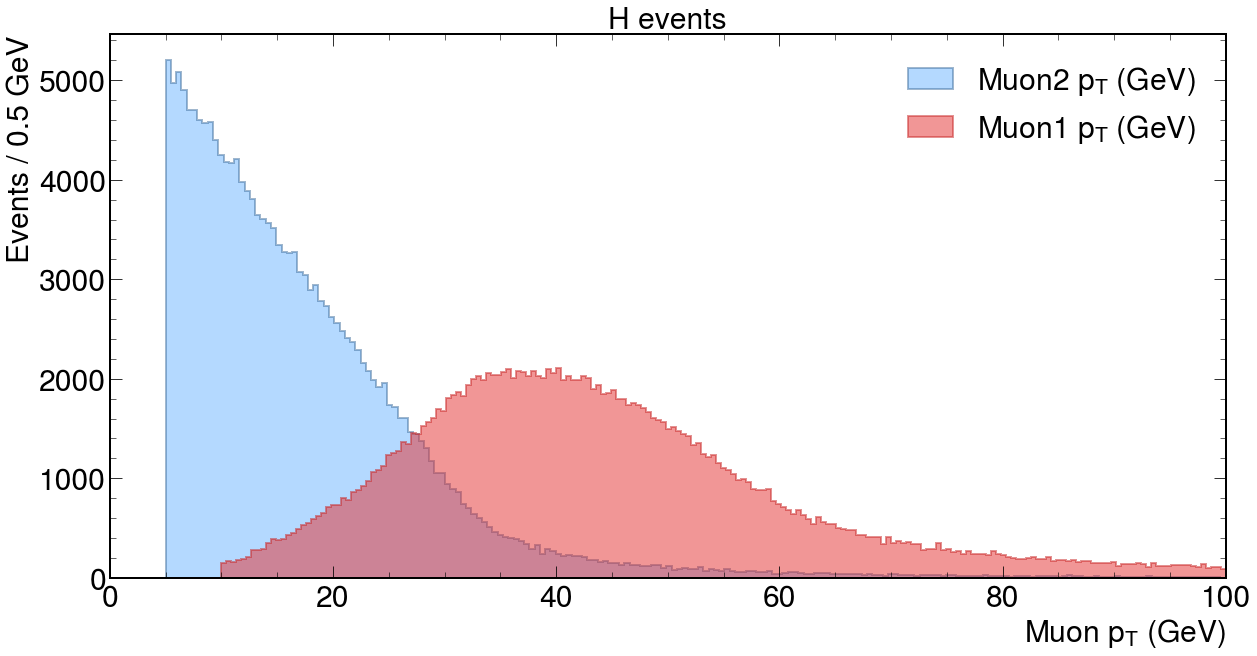

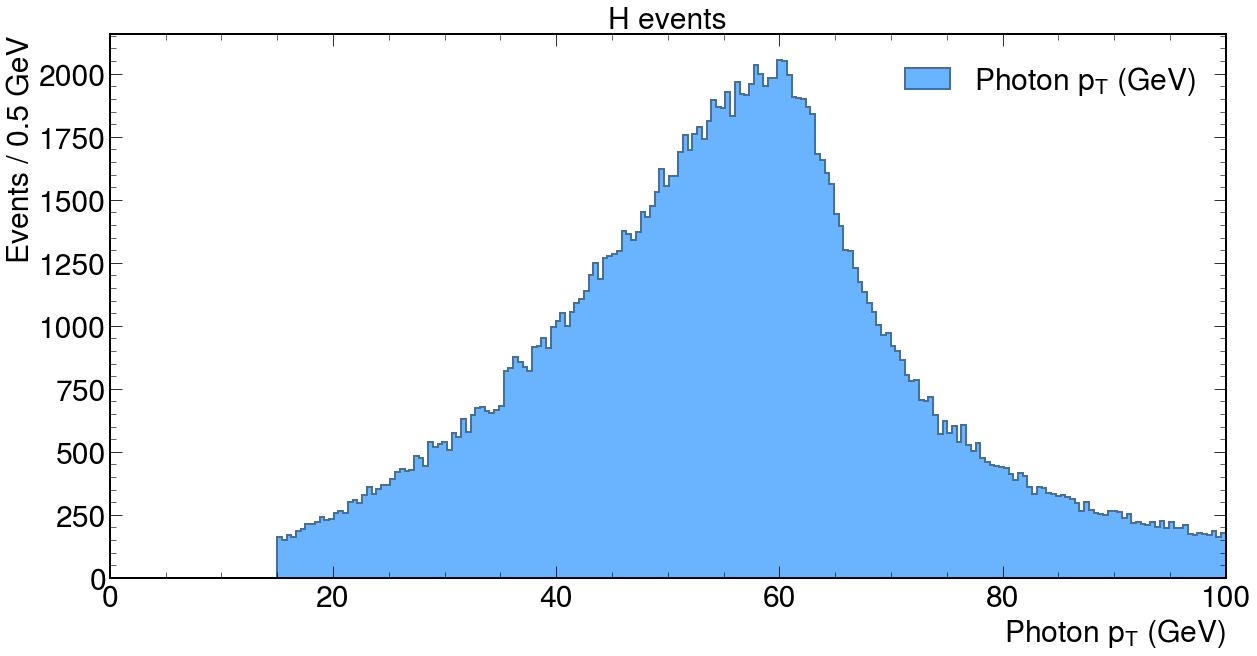

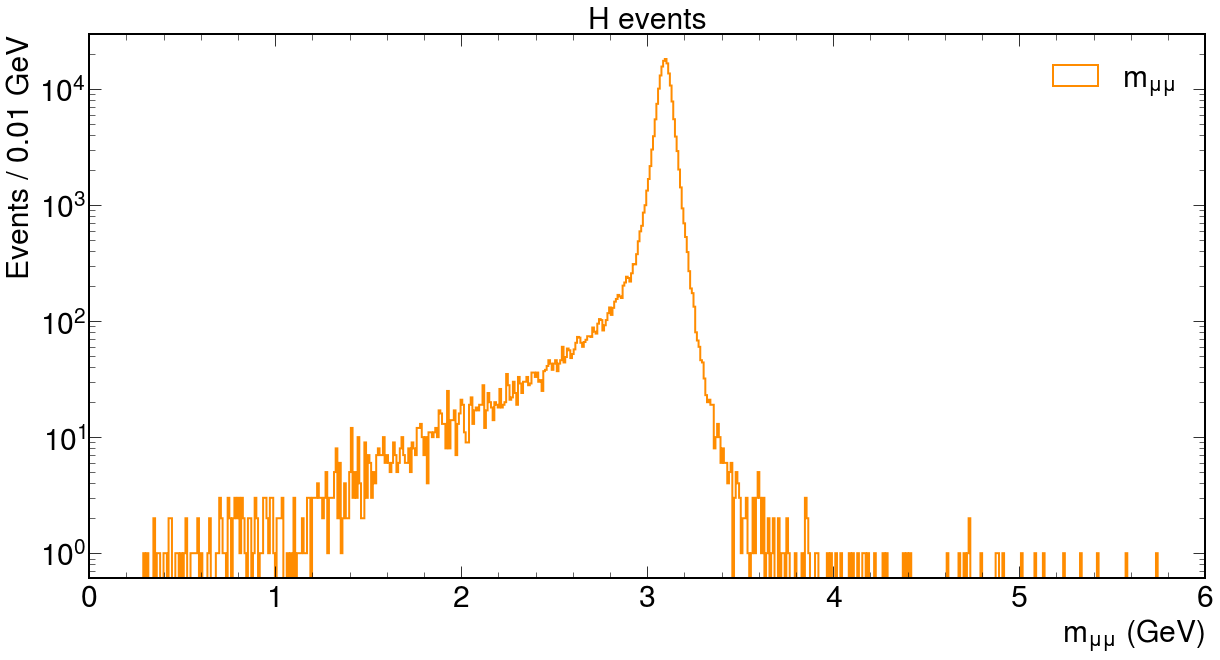

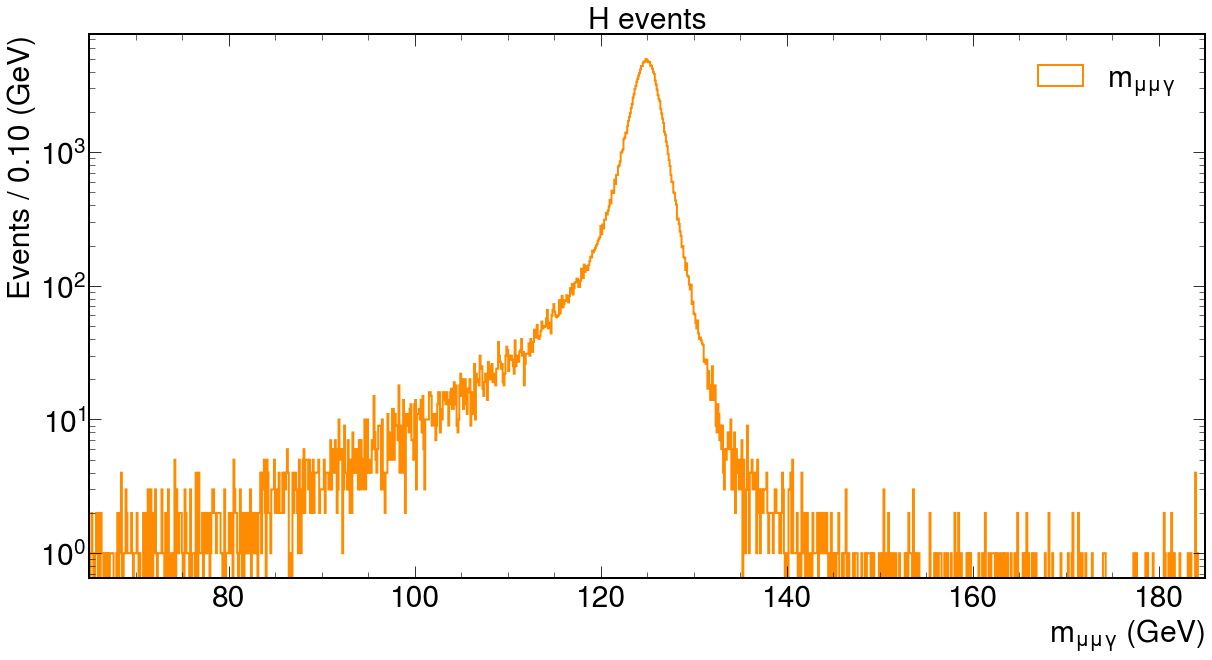

In [7]:
# selected muons, photons, JPsi and HZ
selectedMuon1 = H_events.Muon1
selectedMuon2 = H_events.Muon2
selectedPhoton1 = H_events.Photon1
selectedJPsi = H_events.JPsi
selectedHorZ = H_events.HorZ

# info on cuts
print("Passing from %i preselected events to %i filtered events after HLT trigger AND selection cuts (%.2f%%)" % (len(H_events), ak.sum(H_mask_kin_HLT), ak.sum(H_mask_kin_HLT) / len(H_events) * 100))

# info on mass cuts
print("\n")
print("Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV:", len(selectedJPsi.mass[(selectedJPsi.mass > 3) & (selectedJPsi.mass < 3.2)]))
print("Events that satisfy 70 < m(ZH) < 150 GeV:", len(selectedHorZ.mass[(selectedHorZ.mass > 70.) & (selectedHorZ.mass < 150.)]))
print("Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV AND 70 < m(ZH) < 150 GeV:", len(selectedHorZ.mass[(selectedJPsi.mass > 3) & (selectedJPsi.mass < 3.2) & (selectedHorZ.mass > 70.) & (selectedHorZ.mass < 150.)]))



'''
Muons
'''
_min = 0
_max = 100 # ak.max(selectedMuon1.pt)
width = .5 # GeV
nbins = int(round((_max - _min) / width)) + 1

_muon1_pt =  ak.flatten(selectedMuon1.pt[(selectedMuon1.pt > _min) & (selectedMuon1.pt < _max)], axis = None)
_muon2_pt =  ak.flatten(selectedMuon2.pt[(selectedMuon2.pt > _min) & (selectedMuon2.pt < _max)], axis = None)

fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _muon2_pt,
    bins = nbins,
    histtype = 'stepfilled',
    ec = mainblue[0],
    facecolor = mainblue[1],
    alpha = .5,
    lw = 2.,
    label = r"Muon2 $p_{T}$ (GeV)"
)
ax.hist(
    _muon1_pt,
    bins = nbins,
    histtype = 'stepfilled',
    ec = reddish[0],
    facecolor = reddish[1],
    alpha = .5,
    lw = 2.,
    label = r"Muon1 $p_{T}$ (GeV)"
)
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("Muon $p_{T}$ (GeV)", fontsize = 30)
ax.set_ylabel("Events / %.1f GeV" % width, fontsize = 30)
ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("H events", fontsize = 30)
plt.savefig("plots/muonPt/muonPt_H.pdf")





'''
Photons
'''
_min = 0
_max = 100 # ak.max(selectedPhoton1.pt)
width = .5 # GeV
nbins = int(round((_max - _min) / width)) + 1

_photon1_pt =  ak.flatten(selectedPhoton1.pt[(selectedPhoton1.pt > _min) & (selectedPhoton1.pt < _max)], axis = None)

fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _photon1_pt,
    bins = nbins,
    histtype = 'stepfilled',
    ec = mainblue[0],
    facecolor = mainblue[1],
    alpha = 1.,
    lw = 2.,
    label = r"Photon $p_{T}$ (GeV)"
)
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("Photon $p_{T}$ (GeV)", fontsize = 30)
ax.set_ylabel("Events / %.1f GeV" % width, fontsize = 30)
ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("H events", fontsize = 30)
plt.savefig("plots/photonPt/photonPt_H.pdf")





'''
Invariant mumu mass
'''
_min = 0
_max = 6 # ak.max(selectedJPsi.mass)
width = .01 # GeV
nbins = int(round((_max - _min) / width)) + 1

_JPsi_mass =  ak.flatten(selectedJPsi.mass[(selectedJPsi.mass > _min) & (selectedJPsi.mass < _max)], axis = None)


fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _JPsi_mass, 
    bins = nbins,
    histtype = 'stepfilled',
    ec = H_color,
    facecolor = "none",
    alpha = 1.,
    lw = 2.,
    label = r"$m_{\mu \mu}$"
)
ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("$m_{\mu \mu}\ ({\\rm GeV})$", fontsize = 30)
ax.set_ylabel("Events / %.2f GeV" % width, fontsize = 30)
ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("H events", fontsize = 30)
plt.savefig("plots/m_mumu/m_mumu_H.pdf")





'''
Invariant mumuG mass
'''
_min = 65
_max = 185 # ak.max(selectedHorZ.mass) + 10
width = .1 # GeV
nbins = int(round((_max - _min) / width)) + 1

_HorZ_mass =  ak.flatten(selectedHorZ.mass[(selectedHorZ.mass > _min) & (selectedHorZ.mass < _max)], axis = None)


fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _HorZ_mass, 
    bins = nbins,
    histtype = 'stepfilled',
    ec = H_color,
    facecolor = "none",
    alpha = 1.,
    lw = 2.,
    label = r"$m_{\mu \mu \gamma}$"
)
ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("$m_{\mu \mu \gamma}\ ({\\rm GeV})$", fontsize = 30)
ax.set_ylabel("Events / %.2f (GeV)" % width, fontsize = 30)
ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("H events", fontsize = 30)
plt.savefig("plots/m_mumuG/m_mumuG_H.pdf")

## Combined plots

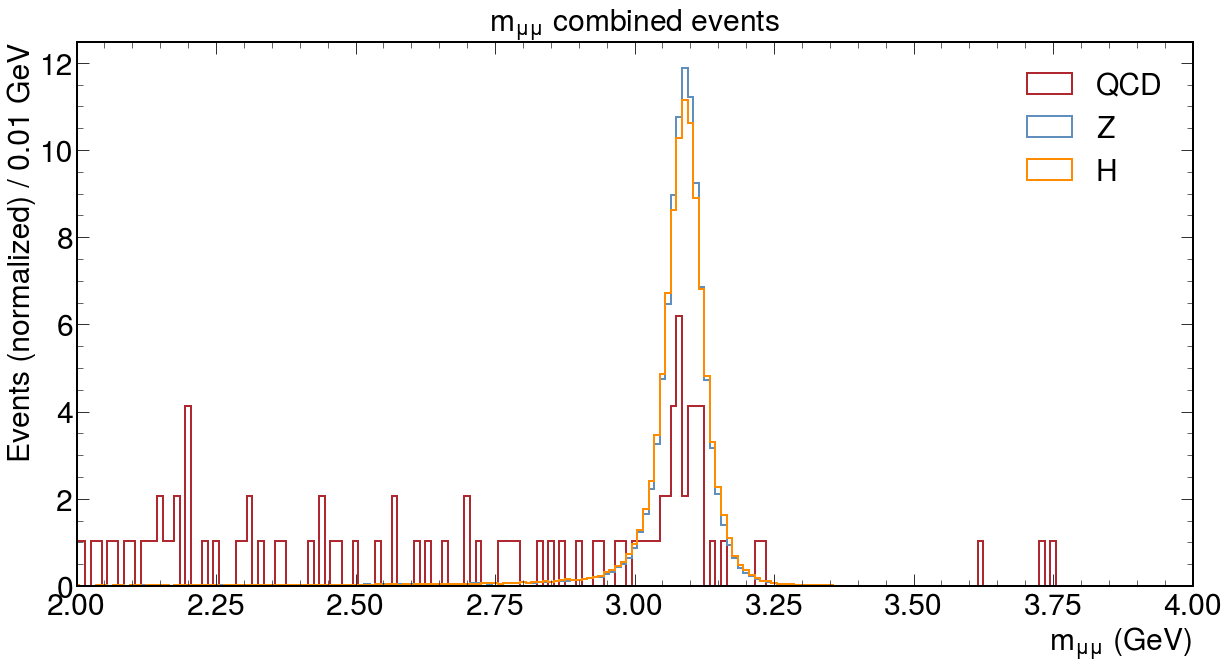

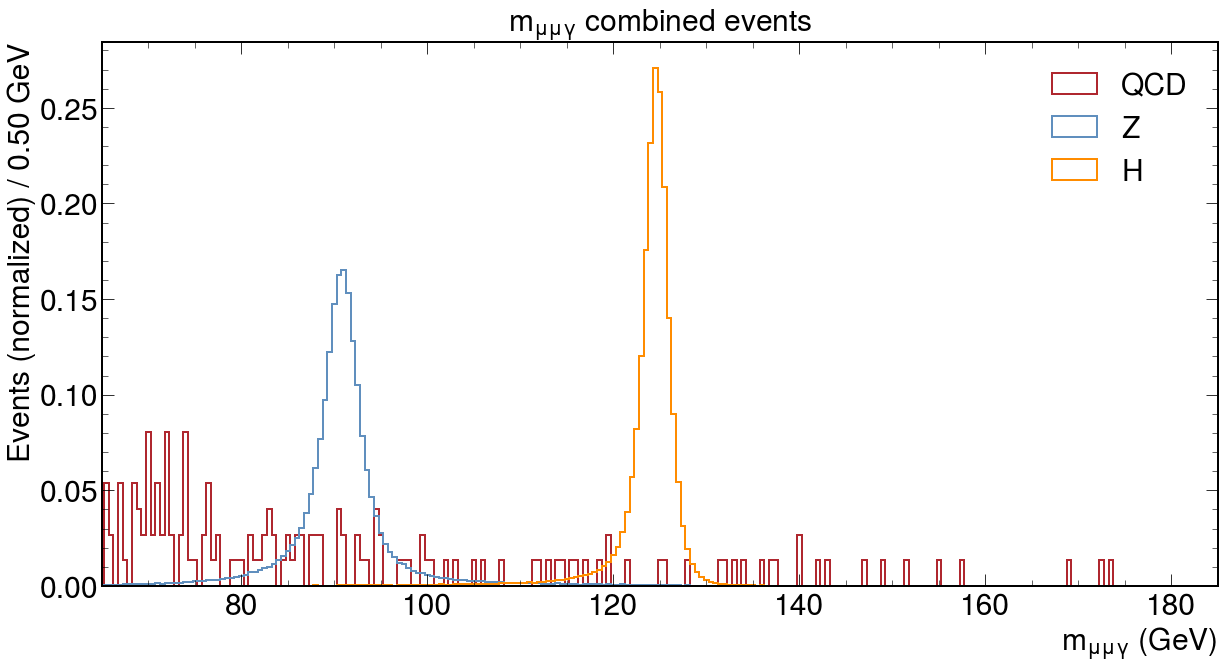

In [8]:
# selectedJPsi and ZH
JPsi_QCD = QCD_events.JPsi
JPsi_Z = Z_events.JPsi
JPsi_H = H_events.JPsi

HorZ_QCD = QCD_events.HorZ
HorZ_Z = Z_events.HorZ
HorZ_H = H_events.HorZ



'''
Invariant mumu mass
'''
_min = 2
_max = 4. # max(ak.max(JPsi_QCD.mass), ak.max(JPsi_Z.mass), ak.max(JPsi_H.mass))
width = .01 # GeV
nbins = int(round((_max - _min) / width)) + 1
xbins = np.linspace(_min, _max, nbins)

_JPsi_mass_QCD =  ak.flatten(JPsi_QCD.mass[(JPsi_QCD.mass > _min) & (JPsi_QCD.mass < _max)], axis = None)
_JPsi_mass_Z =  ak.flatten(JPsi_Z.mass[(JPsi_Z.mass > _min) & (JPsi_Z.mass < _max)], axis = None)
_JPsi_mass_H =  ak.flatten(JPsi_H.mass[(JPsi_H.mass > _min) & (JPsi_H.mass < _max)], axis = None)

_JPsi_mass = [ak.to_numpy(_JPsi_mass_QCD), ak.to_numpy(_JPsi_mass_Z), ak.to_numpy(_JPsi_mass_H)]
labels = ["${\\rm QCD\ events}$", "${\\rm Z\ events}$", "${\\rm H\ events}$"]
colors = [QCD_color, Z_color, H_color]

fig, ax = plt.subplots(figsize=(20, 10))
h, bins, _ = ax.hist(
    _JPsi_mass_QCD, 
    bins = xbins,
    histtype = 'stepfilled',
    ec = QCD_color,
    facecolor = "none",
    alpha = 1.,
    lw = 2.,
    label = 'QCD',
    align = "left",
    density = True
)
    
h, bins, _ = ax.hist(
    _JPsi_mass_Z, 
    bins = xbins,
    histtype = 'stepfilled',
    ec = Z_color,
    facecolor = "none",
    alpha = 1.,
    lw = 2.,
    label = 'Z',
    align = "left",
    density = True
)

h, bins, _ = ax.hist(
    _JPsi_mass_H, 
    bins = xbins,
    histtype = 'stepfilled',
    ec = H_color,
    facecolor = "none",
    alpha = 1.,
    lw = 2.,
    label = 'H',
    align = "left",
    density = True
)
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("$m_{\mu \mu}\ ({\\rm GeV})$", fontsize = 30)
ax.set_ylabel("Events (normalized) / %.2f GeV" % width, fontsize = 30)
ax.set_xlim(_min, _max)
#ax.set_ylim(0, 12)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("$m_{\mu\mu}$ combined events", fontsize = 30)
plt.savefig("plots/m_mumu/m_mumu_combined.pdf")







'''
Invariant mumuG mass
'''
_min = 65.
_max = 185. # max(ak.max(JPsi_QCD.mass), ak.max(JPsi_Z.mass), ak.max(JPsi_H.mass))
width = .5 # GeV
nbins = int(round((_max - _min) / width)) + 1
xbins = np.linspace(_min, _max, nbins)

_HorZ_mass_QCD =  ak.flatten(HorZ_QCD.mass[(HorZ_QCD.mass > _min) & (HorZ_QCD.mass < _max)], axis = None)
_HorZ_mass_Z =  ak.flatten(HorZ_Z.mass[(HorZ_Z.mass > _min) & (HorZ_Z.mass < _max)], axis = None)
_HorZ_mass_H =  ak.flatten(HorZ_H.mass[(HorZ_H.mass > _min) & (HorZ_H.mass < _max)], axis = None)

_HorZ_mass = [ak.to_numpy(_HorZ_mass_QCD), ak.to_numpy(_HorZ_mass_Z), ak.to_numpy(_HorZ_mass_H)]
labels = ["${\\rm QCD\ events}$", "${\\rm Z\ events}$", "${\\rm H\ events}$"]
colors = [QCD_color, Z_color, H_color]

fig, ax = plt.subplots(figsize=(20, 10))
h, bins, _ = ax.hist(
    _HorZ_mass_QCD, 
    bins = xbins,
    histtype = 'stepfilled',
    ec = QCD_color,
    facecolor = "none",
    alpha = 1.,
    lw = 2.,
    label = 'QCD',
    align = "left",
    density = True
)
    
h, bins, _ = ax.hist(
    _HorZ_mass_Z, 
    bins = xbins,
    histtype = 'stepfilled',
    ec = Z_color,
    facecolor = "none",
    alpha = 1.,
    lw = 2.,
    label = 'Z',
    align = "left",
    density = True
)

h, bins, _ = ax.hist(
    _HorZ_mass_H, 
    bins = xbins,
    histtype = 'stepfilled',
    ec = H_color,
    facecolor = "none",
    alpha = 1.,
    lw = 2.,
    label = 'H',
    align = "left",
    density = True
)
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("$m_{\mu \mu \gamma}\ ({\\rm GeV})$", fontsize = 30)
ax.set_ylabel("Events (normalized) / %.2f GeV" % width, fontsize = 30)
ax.set_xlim(_min, _max)
#ax.set_ylim(0, 12)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("$m_{\mu\mu\gamma}$ combined events", fontsize = 30)
plt.savefig("plots//m_mumuG/m_mumuG_combined.pdf")

## Alternate triggers

### HLT_Mu15_Mu10_Photon15

In [9]:
# thresholds
thMuon1, thMuon2, thPhoton, triggerpath = 15., 10., 15., "HLT_Mu15_Mu10_Photon15"

# masks for Muon1, Muon2, Photon
QCD_mask_kin = (QCD_events.Muon1.pt > thMuon1) & (QCD_events.Muon2.pt > thMuon2) & (QCD_events.Photon1.pt > thPhoton)
Z_mask_kin = (Z_events.Muon1.pt > thMuon1) & (Z_events.Muon2.pt > thMuon2) & (Z_events.Photon1.pt > thPhoton)
H_mask_kin = (H_events.Muon1.pt > thMuon1) & (H_events.Muon2.pt > thMuon2) & (H_events.Photon1.pt > thPhoton)

# info on the cuts
print("Total QCD events passing the pre-selection:", len(QCD_events.Muon1.pt))
print("Total Z events passing the pre-selection:", len(Z_events.Muon1.pt))
print("Total H events passing the pre-selection:", len(H_events.Muon1.pt))
print("\n")
print("QCD events passing the %.0f, %.0f (muons) and %.0f (photon) GeV cut:" %(thMuon1, thMuon2, thPhoton),  ak.sum(QCD_mask_kin))
print("Z events passing the %.0f, %.0f (muons) and %.0f (photon) GeV cut:" %(thMuon1, thMuon2, thPhoton),  ak.sum(Z_mask_kin))
print("H events passing the %.0f, %.0f (muons) and %.0f (photon) GeV cut:" %(thMuon1, thMuon2, thPhoton),  ak.sum(H_mask_kin))

# efficiencies
QCD_eff_selection =  ak.sum(QCD_mask_kin) / Ntot_QCD_events * 100
Z_eff_selection =  ak.sum(Z_mask_kin) / Ntot_Z_events * 100
H_eff_selection =  ak.sum(H_mask_kin) / Ntot_H_events * 100

# print info on selection efficiency
print("\n")
print("QCD selection efficiency: %i/%i = %.5f%%" % (ak.sum(QCD_mask_kin), Ntot_QCD_events, QCD_eff_selection))
print("Z selection efficiency: %i/%i = %.5f%%" % (ak.sum(Z_mask_kin), Ntot_Z_events, Z_eff_selection))
print("H selection efficiency: %i/%i = %.5f%%" % (ak.sum(H_mask_kin), Ntot_H_events, H_eff_selection))

Total QCD events passing the pre-selection: 527
Total Z events passing the pre-selection: 137497
Total H events passing the pre-selection: 179556


QCD events passing the 15, 10 (muons) and 15 (photon) GeV cut: 94
Z events passing the 15, 10 (muons) and 15 (photon) GeV cut: 94330
H events passing the 15, 10 (muons) and 15 (photon) GeV cut: 128356


QCD selection efficiency: 94/21335910 = 0.00044%
Z selection efficiency: 94330/459000 = 20.55120%
H selection efficiency: 128356/448000 = 28.65089%


### HLT_Mu15_Mu10_Photon20

In [10]:
# thresholds
thMuon1, thMuon2, thPhoton, triggerpath = 15., 10., 20., "HLT_Mu15_Mu10_Photon20"

# masks for Muon1, Muon2, Photon
QCD_mask_kin = (QCD_events.Muon1.pt > thMuon1) & (QCD_events.Muon2.pt > thMuon2) & (QCD_events.Photon1.pt > thPhoton)
Z_mask_kin = (Z_events.Muon1.pt > thMuon1) & (Z_events.Muon2.pt > thMuon2) & (Z_events.Photon1.pt > thPhoton)
H_mask_kin = (H_events.Muon1.pt > thMuon1) & (H_events.Muon2.pt > thMuon2) & (H_events.Photon1.pt > thPhoton)

# info on the cuts
print("Total QCD events passing the pre-selection:", len(QCD_events.Muon1.pt))
print("Total Z events passing the pre-selection:", len(Z_events.Muon1.pt))
print("Total H events passing the pre-selection:", len(H_events.Muon1.pt))
print("\n")
print("QCD events passing the %.0f, %.0f (muons) and %.0f (photon) GeV cut:" %(thMuon1, thMuon2, thPhoton),  ak.sum(QCD_mask_kin))
print("Z events passing the %.0f, %.0f (muons) and %.0f (photon) GeV cut:" %(thMuon1, thMuon2, thPhoton),  ak.sum(Z_mask_kin))
print("H events passing the %.0f, %.0f (muons) and %.0f (photon) GeV cut:" %(thMuon1, thMuon2, thPhoton),  ak.sum(H_mask_kin))

# efficiencies
QCD_eff_selection =  ak.sum(QCD_mask_kin) / Ntot_QCD_events * 100
Z_eff_selection =  ak.sum(Z_mask_kin) / Ntot_Z_events * 100
H_eff_selection =  ak.sum(H_mask_kin) / Ntot_H_events * 100

# print info on selection efficiency
print("\n")
print("QCD selection efficiency: %i/%i = %.5f%%" % (ak.sum(QCD_mask_kin), Ntot_QCD_events, QCD_eff_selection))
print("Z selection efficiency: %i/%i = %.5f%%" % (ak.sum(Z_mask_kin), Ntot_Z_events, Z_eff_selection))
print("H selection efficiency: %i/%i = %.5f%%" % (ak.sum(H_mask_kin), Ntot_H_events, H_eff_selection))

Total QCD events passing the pre-selection: 527
Total Z events passing the pre-selection: 137497
Total H events passing the pre-selection: 179556


QCD events passing the 15, 10 (muons) and 20 (photon) GeV cut: 48
Z events passing the 15, 10 (muons) and 20 (photon) GeV cut: 92317
H events passing the 15, 10 (muons) and 20 (photon) GeV cut: 126673


QCD selection efficiency: 48/21335910 = 0.00022%
Z selection efficiency: 92317/459000 = 20.11264%
H selection efficiency: 126673/448000 = 28.27522%


### HLT_Mu15_Mu10_Photon25

In [11]:
# thresholds
thMuon1, thMuon2, thPhoton, triggerpath = 15., 10., 25., "HLT_Mu15_Mu10_Photon25"

# masks for Muon1, Muon2, Photon
QCD_mask_kin = (QCD_events.Muon1.pt > thMuon1) & (QCD_events.Muon2.pt > thMuon2) & (QCD_events.Photon1.pt > thPhoton)
Z_mask_kin = (Z_events.Muon1.pt > thMuon1) & (Z_events.Muon2.pt > thMuon2) & (Z_events.Photon1.pt > thPhoton)
H_mask_kin = (H_events.Muon1.pt > thMuon1) & (H_events.Muon2.pt > thMuon2) & (H_events.Photon1.pt > thPhoton)

# info on the cuts
print("Total QCD events passing the pre-selection:", len(QCD_events.Muon1.pt))
print("Total Z events passing the pre-selection:", len(Z_events.Muon1.pt))
print("Total H events passing the pre-selection:", len(H_events.Muon1.pt))
print("\n")
print("QCD events passing the %.0f, %.0f (muons) and %.0f (photon) GeV cut:" %(thMuon1, thMuon2, thPhoton),  ak.sum(QCD_mask_kin))
print("Z events passing the %.0f, %.0f (muons) and %.0f (photon) GeV cut:" %(thMuon1, thMuon2, thPhoton),  ak.sum(Z_mask_kin))
print("H events passing the %.0f, %.0f (muons) and %.0f (photon) GeV cut:" %(thMuon1, thMuon2, thPhoton),  ak.sum(H_mask_kin))

# efficiencies
QCD_eff_selection =  ak.sum(QCD_mask_kin) / Ntot_QCD_events * 100
Z_eff_selection =  ak.sum(Z_mask_kin) / Ntot_Z_events * 100
H_eff_selection =  ak.sum(H_mask_kin) / Ntot_H_events * 100

# print info on selection efficiency
print("\n")
print("QCD selection efficiency: %i/%i = %.5f%%" % (ak.sum(QCD_mask_kin), Ntot_QCD_events, QCD_eff_selection))
print("Z selection efficiency: %i/%i = %.5f%%" % (ak.sum(Z_mask_kin), Ntot_Z_events, Z_eff_selection))
print("H selection efficiency: %i/%i = %.5f%%" % (ak.sum(H_mask_kin), Ntot_H_events, H_eff_selection))

Total QCD events passing the pre-selection: 527
Total Z events passing the pre-selection: 137497
Total H events passing the pre-selection: 179556


QCD events passing the 15, 10 (muons) and 25 (photon) GeV cut: 28
Z events passing the 15, 10 (muons) and 25 (photon) GeV cut: 88830
H events passing the 15, 10 (muons) and 25 (photon) GeV cut: 124069


QCD selection efficiency: 28/21335910 = 0.00013%
Z selection efficiency: 88830/459000 = 19.35294%
H selection efficiency: 124069/448000 = 27.69397%


### Test: dR

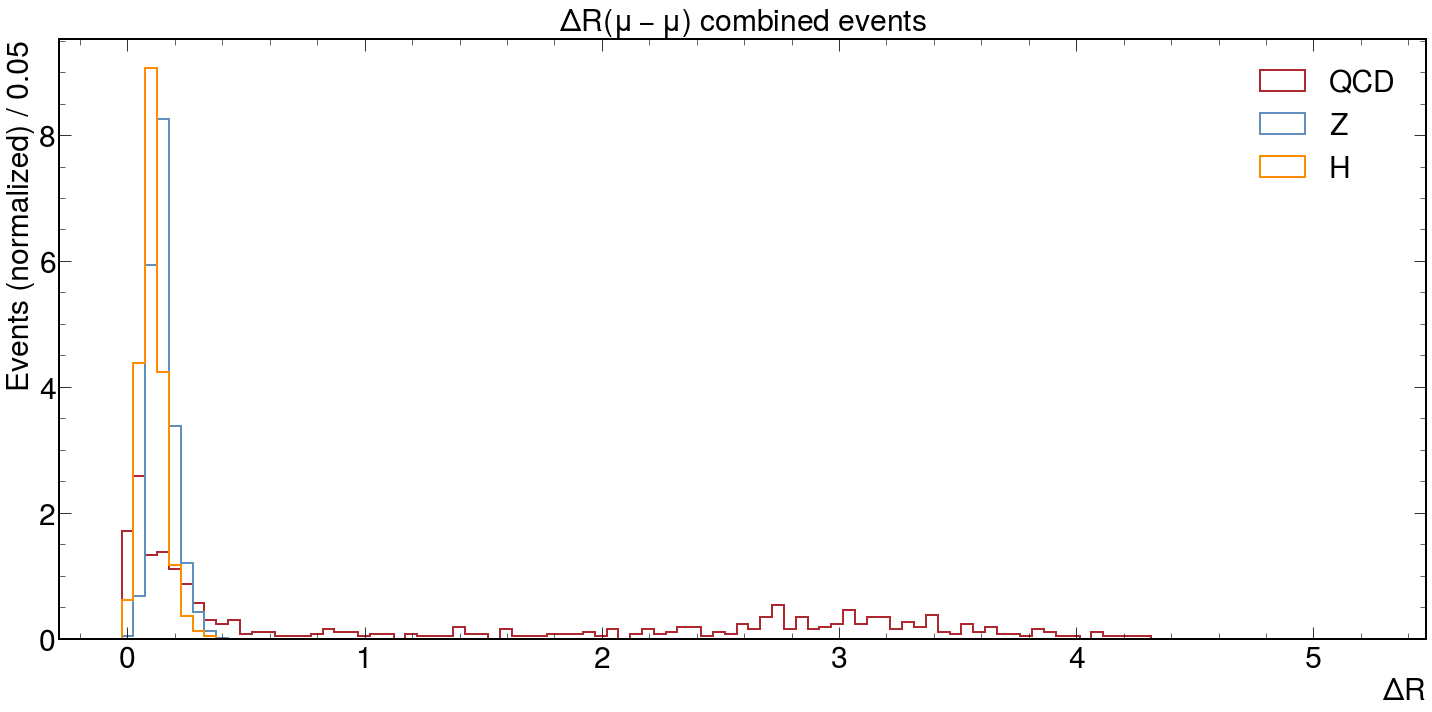

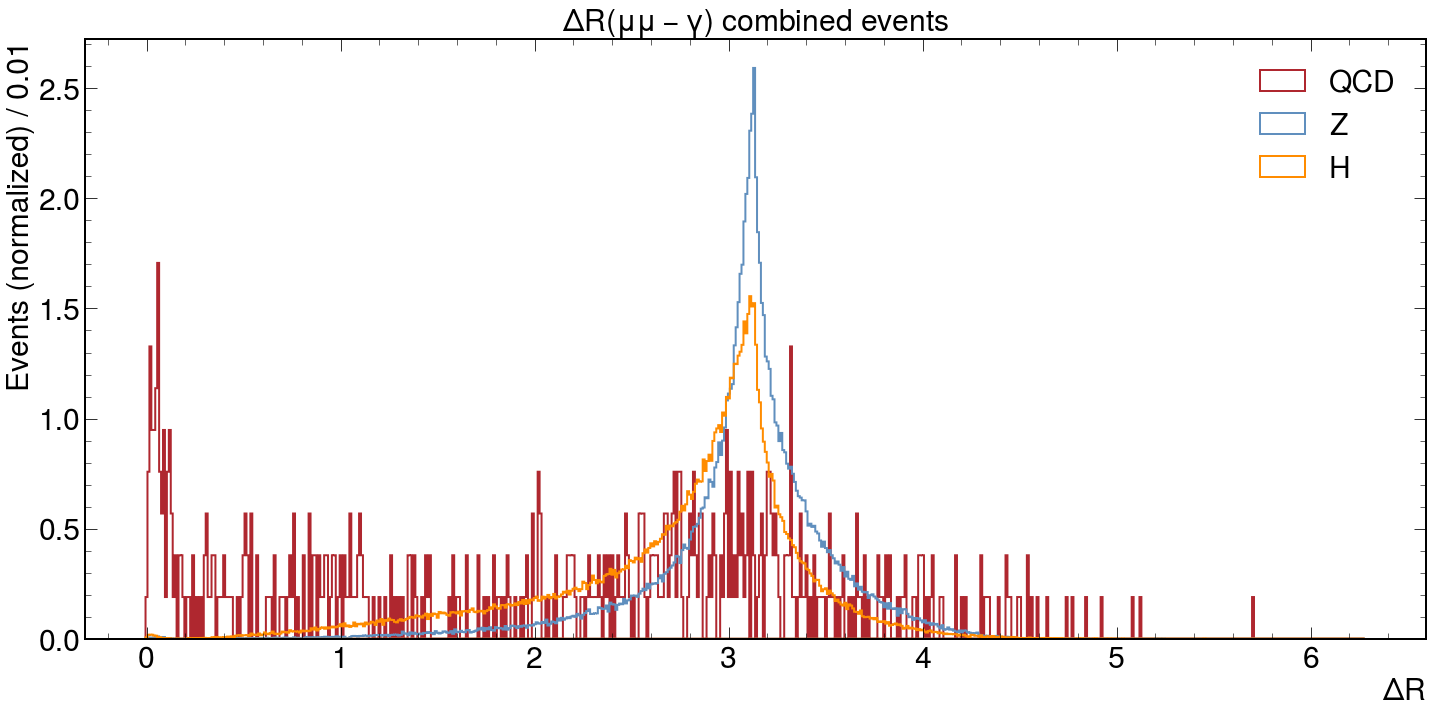

In [12]:
# minimize cuts on Muon and photon to inspect the dR info
thMuon1, thPhoton, triggerpath = 10., 15., "HLT_Mu10_Photon15"

# masks for Muon1, Photon
QCD_mask_kin = (QCD_events.Muon1.pt > thMuon1) & (QCD_events.Photon1.pt > thPhoton)
Z_mask_kin = (Z_events.Muon1.pt > thMuon1) & (Z_events.Photon1.pt > thPhoton)
H_mask_kin = (H_events.Muon1.pt > thMuon1) & (H_events.Photon1.pt > thPhoton)

# select JPsi events
JPsi_QCD = QCD_events.JPsi[QCD_mask_kin]
JPsi_Z = Z_events.JPsi[Z_mask_kin]
JPsi_H = H_events.JPsi[H_mask_kin]

# select ZH events
HorZ_QCD = QCD_events.HorZ[QCD_mask_kin]
HorZ_Z = Z_events.HorZ[Z_mask_kin]
HorZ_H = H_events.HorZ[H_mask_kin]










'''
JPsi dR
'''
_min = 0.
_max = 5 * np.pi / 3. # max(ak.max(JPsi_QCD.dR), ak.max(JPsi_Z.dR), ak.max(JPsi_H.dR))
width = 0.05 # GeV
nbins = int(round((_max - _min) / width)) + 1
xbins = np.linspace(_min, _max, nbins)

_JPsi_dR_QCD =  ak.flatten(JPsi_QCD.dR[(JPsi_QCD.dR > _min) & (JPsi_QCD.dR < _max)], axis = None)
_JPsi_dR_Z =  ak.flatten(JPsi_Z.dR[(JPsi_Z.dR > _min) & (JPsi_Z.dR < _max)], axis = None)
_JPsi_dR_H =  ak.flatten(JPsi_H.dR[(JPsi_H.dR > _min) & (JPsi_H.dR < _max)], axis = None)

_JPsi_dR = [ak.to_numpy(_JPsi_dR_QCD), ak.to_numpy(_JPsi_dR_Z), ak.to_numpy(_JPsi_dR_H)]
labels = ["${\\rm QCD\ events}$", "${\\rm Z\ events}$", "${\\rm H\ events}$"]
colors = [QCD_color, Z_color, H_color]

fig, ax = plt.subplots(figsize=(20, 10))

h, bins, _ = ax.hist(
    _JPsi_dR_QCD, 
    bins = xbins,
    histtype = 'stepfilled',
    ec = QCD_color,
    facecolor = "none",
    alpha = 1.,
    lw = 2.,
    label = 'QCD',
    align = "left",
    density = True
    )
    
h, bins, _ = ax.hist(
    _JPsi_dR_Z, 
    bins = xbins,
    histtype = 'stepfilled',
    ec = Z_color,
    facecolor = "none",
    alpha = 1.,
    lw = 2.,
    label = 'Z',
    align = "left",
    density = True
    )

h, bins, _ = ax.hist(
    _JPsi_dR_H, 
    bins = xbins,
    histtype = 'stepfilled',
    ec = H_color,
    facecolor = "none",
    alpha = 1.,
    lw = 2.,
    label = 'H',
    align = "left",
    density = True
    )

#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("$\Delta R$", fontsize = 30)
ax.set_ylabel("Events (normalized) / %.2f" % width, fontsize = 30)
#ax.set_xlim(_min, _max)
#ax.set_ylim(0, 12)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("$\Delta R(\mu-\mu)$ combined events", fontsize = 30)
fig.tight_layout()
plt.savefig("plots/dR/dR_mumu_combined.pdf")












'''
ZH dR
'''
_min = 0.
_max = 2 * np.pi # max(ak.max(HorZ_QCD.dR), ak.max(HorZ_Z.dR), ak.max(HorZ_H.dR))
width = 0.01 # GeV
nbins = int(round((_max - _min) / width)) + 1
xbins = np.linspace(_min, _max, nbins)

_HorZ_dR_QCD =  ak.flatten(HorZ_QCD.dR[(HorZ_QCD.dR > _min) & (HorZ_QCD.dR < _max)], axis = None)
_HorZ_dR_Z =  ak.flatten(HorZ_Z.dR[(HorZ_Z.dR > _min) & (HorZ_Z.dR < _max)], axis = None)
_HorZ_dR_H =  ak.flatten(HorZ_H.dR[(HorZ_H.dR > _min) & (HorZ_H.dR < _max)], axis = None)

_HorZ_dR = [ak.to_numpy(_HorZ_dR_QCD), ak.to_numpy(_HorZ_dR_Z), ak.to_numpy(_HorZ_dR_H)]
labels = ["${\\rm QCD\ events}$", "${\\rm Z\ events}$", "${\\rm H\ events}$"]
colors = [QCD_color, Z_color, H_color]

fig, ax = plt.subplots(figsize=(20, 10))


h, bins, _ = ax.hist(
    _HorZ_dR_QCD, 
    bins = xbins,
    histtype = 'stepfilled',
    ec = QCD_color,
    facecolor = "none",
    alpha = 1.,
    lw = 2.,
    label = 'QCD',
    align = "left",
    density = True
    )
    
h, bins, _ = ax.hist(
    _HorZ_dR_Z, 
    bins = xbins,
    histtype = 'stepfilled',
    ec = Z_color,
    facecolor = "none",
    alpha = 1.,
    lw = 2.,
    label = 'Z',
    align = "left",
    density = True
    )

h, bins, _ = ax.hist(
    _HorZ_dR_H, 
    bins = xbins,
    histtype = 'stepfilled',
    ec = H_color,
    facecolor = "none",
    alpha = 1.,
    lw = 2.,
    label = 'H',
    align = "left",
    density = True
    )

#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("$\Delta R$", fontsize = 30)
ax.set_ylabel("Events (normalized) / %.2f" % width, fontsize = 30)
#ax.set_xlim(_min, _max)
#ax.set_ylim(0, 12)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("$\Delta R(\mu\mu-\gamma)$ combined events", fontsize = 30)
fig.tight_layout()
plt.savefig("plots/dR/dR_mumuG_combined.pdf")



### HLT_Mu18_Photon24_dR04

In [13]:
# thresholds
thMuon1, thPhoton, thdR, triggerpath = 18., 24., 0.4, "HLT_Mu18_Photon24_dR04"

# masks for Muon1, Muon2, Photon
QCD_mask_kin = (QCD_events.Muon1.pt > thMuon1) & (QCD_events.Photon1.pt > thPhoton) & (QCD_events.JPsi.dR < thdR) 
Z_mask_kin = (Z_events.Muon1.pt > thMuon1) & (Z_events.Photon1.pt > thPhoton) & (Z_events.JPsi.dR < thdR) 
H_mask_kin = (H_events.Muon1.pt > thMuon1) & (H_events.Photon1.pt > thPhoton) & (H_events.JPsi.dR < thdR)

# info on the cuts
print("Total QCD events passing the pre-selection:", len(QCD_events.Muon1.pt))
print("Total Z events passing the pre-selection:", len(Z_events.Muon1.pt))
print("Total H events passing the pre-selection:", len(H_events.Muon1.pt))
print("\n")
print("QCD events passing the %.0f (muons) and %.0f (photon) GeV cut and dR(JPsi) < %.0f:" %(thMuon1, thPhoton, thdR),  ak.sum(QCD_mask_kin))
print("Z events passing the %.0f (muons) and %.0f (photon) GeV cut and dR(JPsi) < %.0f:" %(thMuon1, thPhoton, thdR),  ak.sum(Z_mask_kin))
print("H events passing the %.0f (muons) and %.0f (photon) GeV cut and dR(JPsi) < %.0f:" %(thMuon1, thPhoton, thdR),  ak.sum(H_mask_kin))

# efficiencies
QCD_eff_selection =  ak.sum(QCD_mask_kin) / Ntot_QCD_events * 100
Z_eff_selection =  ak.sum(Z_mask_kin) / Ntot_Z_events * 100
H_eff_selection =  ak.sum(H_mask_kin) / Ntot_H_events * 100

# print info on selection efficiency
print("\n")
print("QCD selection efficiency: %i/%i = %.5f%%" % (ak.sum(QCD_mask_kin), Ntot_QCD_events, QCD_eff_selection))
print("Z selection efficiency: %i/%i = %.5f%%" % (ak.sum(Z_mask_kin), Ntot_Z_events, Z_eff_selection))
print("H selection efficiency: %i/%i = %.5f%%" % (ak.sum(H_mask_kin), Ntot_H_events, H_eff_selection))

Total QCD events passing the pre-selection: 527
Total Z events passing the pre-selection: 137497
Total H events passing the pre-selection: 179556


QCD events passing the 18 (muons) and 24 (photon) GeV cut and dR(JPsi) < 0: 29
Z events passing the 18 (muons) and 24 (photon) GeV cut and dR(JPsi) < 0: 113505
H events passing the 18 (muons) and 24 (photon) GeV cut and dR(JPsi) < 0: 168665


QCD selection efficiency: 29/21335910 = 0.00014%
Z selection efficiency: 113505/459000 = 24.72876%
H selection efficiency: 168665/448000 = 37.64844%


### Test: $2\text{ }\mathrm{GeV}<m({\rm J}/\psi) < 4 \text{ }\mathrm{GeV} $

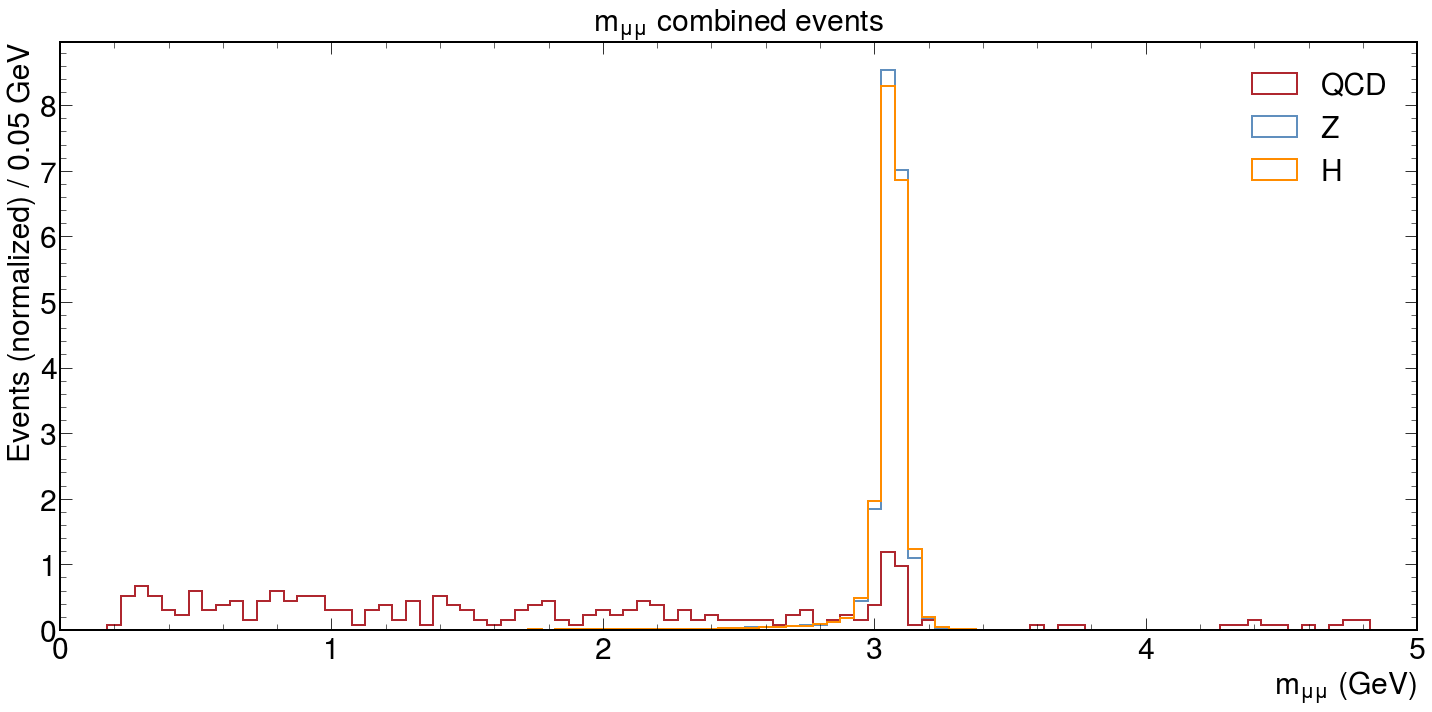

In [14]:
# minimize cuts on Muon and photon to inspect the mass info
thMuon1, thPhoton, triggerpath = 10., 15., "HLT_Mu10_Photon15"

# masks for Muon1, Photon
QCD_mask_kin = (QCD_events.Muon1.pt > thMuon1) & (QCD_events.Photon1.pt > thPhoton)
Z_mask_kin = (Z_events.Muon1.pt > thMuon1) & (Z_events.Photon1.pt > thPhoton)
H_mask_kin = (H_events.Muon1.pt > thMuon1) & (H_events.Photon1.pt > thPhoton)

# select JPsi events
JPsi_QCD = QCD_events.JPsi[QCD_mask_kin]
JPsi_Z = Z_events.JPsi[Z_mask_kin]
JPsi_H = H_events.JPsi[H_mask_kin]

# select ZH events
HorZ_QCD = QCD_events.HorZ[QCD_mask_kin]
HorZ_Z = Z_events.HorZ[Z_mask_kin]
HorZ_H = H_events.HorZ[H_mask_kin]










'''
JPsi mass
'''
_min = 0.
_max = 5. # max(ak.max(JPsi_QCD.mass), ak.max(JPsi_Z.mass), ak.max(JPsi_H.mass))
width = 0.05 # GeV
nbins = int(round((_max - _min) / width)) + 1
xbins = np.linspace(_min, _max, nbins)

_JPsi_mass_QCD =  ak.flatten(JPsi_QCD.mass[(JPsi_QCD.mass > _min) & (JPsi_QCD.mass < _max)], axis = None)
_JPsi_mass_Z =  ak.flatten(JPsi_Z.mass[(JPsi_Z.mass > _min) & (JPsi_Z.mass < _max)], axis = None)
_JPsi_mass_H =  ak.flatten(JPsi_H.mass[(JPsi_H.mass > _min) & (JPsi_H.mass < _max)], axis = None)

_JPsi_mass = [ak.to_numpy(_JPsi_mass_QCD), ak.to_numpy(_JPsi_mass_Z), ak.to_numpy(_JPsi_mass_H)]
labels = ["${\\rm QCD\ events}$", "${\\rm Z\ events}$", "${\\rm H\ events}$"]
colors = [QCD_color, Z_color, H_color]

fig, ax = plt.subplots(figsize=(20, 10))
h, bins, _ = ax.hist(
    _JPsi_mass_QCD, 
    bins = xbins,
    histtype = 'stepfilled',
    ec = QCD_color,
    facecolor = "none",
    alpha = 1.,
    lw = 2.,
    label = 'QCD',
    align = "left",
    density = True
    )
    
h, bins, _ = ax.hist(
    _JPsi_mass_Z, 
    bins = xbins,
    histtype = 'stepfilled',
    ec = Z_color,
    facecolor = "none",
    alpha = 1.,
    lw = 2.,
    label = 'Z',
    align = "left",
    density = True
    )

h, bins, _ = ax.hist(
    _JPsi_mass_H, 
    bins = xbins,
    histtype = 'stepfilled',
    ec = H_color,
    facecolor = "none",
    alpha = 1.,
    lw = 2.,
    label = 'H',
    align = "left",
    density = True
    )
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("$m_{\mu\mu}\ ({\\rm GeV})$", fontsize = 30)
ax.set_ylabel("Events (normalized) / %.2f GeV" % width, fontsize = 30)
ax.set_xlim(_min, _max)
#ax.set_ylim(0, 12)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("$m_{\mu\mu}$ combined events", fontsize = 30)
fig.tight_layout()
plt.savefig("plots/m_mumu/m_mumu_combined_TestForCut.pdf")

### HLT_Mu15_Photon20_2mumuM4

In [15]:
# thresholds
thMuon1, thPhoton, thMuMu_mass, triggerpath = 15., 20., (2., 4.), "HLT_Mu15_Photon20_2mumuM4"

# masks for Muon1, Muon2, Photon
QCD_mask_kin = (QCD_events.Muon1.pt > thMuon1) & (QCD_events.Photon1.pt > thPhoton) & (QCD_events.JPsi.mass > thMuMu_mass[0]) & (QCD_events.JPsi.mass < thMuMu_mass[1])
Z_mask_kin = (Z_events.Muon1.pt > thMuon1) & (Z_events.Photon1.pt > thPhoton) & (Z_events.JPsi.mass > thMuMu_mass[0]) & (Z_events.JPsi.mass < thMuMu_mass[1])
H_mask_kin = (H_events.Muon1.pt > thMuon1) & (H_events.Photon1.pt > thPhoton) & (H_events.JPsi.mass > thMuMu_mass[0]) & (H_events.JPsi.mass < thMuMu_mass[1])

# info on the cuts
print("Total QCD events passing the pre-selection:", len(QCD_events.Muon1.pt))
print("Total Z events passing the pre-selection:", len(Z_events.Muon1.pt))
print("Total H events passing the pre-selection:", len(H_events.Muon1.pt))
print("\n")
print("QCD events passing the %.0f (muons) and %.0f (photon) GeV cut and (%.0f, %.0f) mass interval for (JPsi):" %(thMuon1, thPhoton, *thMuMu_mass),  ak.sum(QCD_mask_kin))
print("Z events passing the %.0f (muons) and %.0f (photon) GeV cut and (%.0f, %.0f) mass interval for (JPsi):" %(thMuon1, thPhoton, *thMuMu_mass),  ak.sum(Z_mask_kin))
print("H events passing the %.0f (muons) and %.0f (photon) GeV cut and (%.0f, %.0f) mass interval for (JPsi):" %(thMuon1, thPhoton, *thMuMu_mass),  ak.sum(H_mask_kin))

# efficiencies
QCD_eff_selection =  ak.sum(QCD_mask_kin) / Ntot_QCD_events * 100
Z_eff_selection =  ak.sum(Z_mask_kin) / Ntot_Z_events * 100
H_eff_selection =  ak.sum(H_mask_kin) / Ntot_H_events * 100

# print info on selection efficiency
print("\n")
print("QCD selection efficiency: %i/%i = %.5f%%" % (ak.sum(QCD_mask_kin), Ntot_QCD_events, QCD_eff_selection))
print("Z selection efficiency: %i/%i = %.5f%%" % (ak.sum(Z_mask_kin), Ntot_Z_events, Z_eff_selection))
print("H selection efficiency: %i/%i = %.5f%%" % (ak.sum(H_mask_kin), Ntot_H_events, H_eff_selection))

Total QCD events passing the pre-selection: 527
Total Z events passing the pre-selection: 137497
Total H events passing the pre-selection: 179556


QCD events passing the 15 (muons) and 20 (photon) GeV cut and (2, 4) mass interval for (JPsi): 28
Z events passing the 15 (muons) and 20 (photon) GeV cut and (2, 4) mass interval for (JPsi): 125836
H events passing the 15 (muons) and 20 (photon) GeV cut and (2, 4) mass interval for (JPsi): 173615


QCD selection efficiency: 28/21335910 = 0.00013%
Z selection efficiency: 125836/459000 = 27.41525%
H selection efficiency: 173615/448000 = 38.75335%


### HLT_Mu10_Mu05_Photon22.7_2mumuM4

In [16]:
# thresholds
thMuon1, thMuon2, thPhoton, thMuMu_mass, triggerpath = 10, 5., 22.7, (2., 4), "HLT_Mu10_Mu05_Photon22.7_2mumuM4"

# masks for Muon1, Muon2, Photon
QCD_mask_kin = (QCD_events.Muon1.pt > thMuon1) & (QCD_events.Muon2.pt > thMuon2) & (QCD_events.Photon1.pt > thPhoton) & (QCD_events.JPsi.mass > thMuMu_mass[0]) & (QCD_events.JPsi.mass < thMuMu_mass[1])
Z_mask_kin = (Z_events.Muon1.pt > thMuon1) & (Z_events.Muon2.pt > thMuon2) & (Z_events.Photon1.pt > thPhoton) & (Z_events.JPsi.mass > thMuMu_mass[0]) & (Z_events.JPsi.mass < thMuMu_mass[1])
H_mask_kin = (H_events.Muon1.pt > thMuon1) & (H_events.Muon2.pt > thMuon2) & (H_events.Photon1.pt > thPhoton) & (H_events.JPsi.mass > thMuMu_mass[0]) & (H_events.JPsi.mass < thMuMu_mass[1])

# info on the cuts
print("Total QCD events passing the pre-selection:", len(QCD_events.Muon1.pt))
print("Total Z events passing the pre-selection:", len(Z_events.Muon1.pt))
print("Total H events passing the pre-selection:", len(H_events.Muon1.pt))
print("\n")
print("QCD events passing the %.0f (muons) and %.0f (photon) GeV cut and (%.0f, %.0f) mass interval for (JPsi):" %(thMuon1, thPhoton, *thMuMu_mass),  ak.sum(QCD_mask_kin))
print("Z events passing the %.0f (muons) and %.0f (photon) GeV cut and (%.0f, %.0f) mass interval for (JPsi):" %(thMuon1, thPhoton, *thMuMu_mass),  ak.sum(Z_mask_kin))
print("H events passing the %.0f (muons) and %.0f (photon) GeV cut and (%.0f, %.0f) mass interval for (JPsi):" %(thMuon1, thPhoton, *thMuMu_mass),  ak.sum(H_mask_kin))

# efficiencies
QCD_eff_selection =  ak.sum(QCD_mask_kin) / Ntot_QCD_events * 100
Z_eff_selection =  ak.sum(Z_mask_kin) / Ntot_Z_events * 100
H_eff_selection =  ak.sum(H_mask_kin) / Ntot_H_events * 100

# print info on selection efficiency
print("\n")
print("QCD selection efficiency: %i/%i = %.5f%%" % (ak.sum(QCD_mask_kin), Ntot_QCD_events, QCD_eff_selection))
print("Z selection efficiency: %i/%i = %.5f%%" % (ak.sum(Z_mask_kin), Ntot_Z_events, Z_eff_selection))
print("H selection efficiency: %i/%i = %.5f%%" % (ak.sum(H_mask_kin), Ntot_H_events, H_eff_selection))

Total QCD events passing the pre-selection: 527
Total Z events passing the pre-selection: 137497
Total H events passing the pre-selection: 179556


QCD events passing the 10 (muons) and 23 (photon) GeV cut and (2, 4) mass interval for (JPsi): 35
Z events passing the 10 (muons) and 23 (photon) GeV cut and (2, 4) mass interval for (JPsi): 129513
H events passing the 10 (muons) and 23 (photon) GeV cut and (2, 4) mass interval for (JPsi): 174286


QCD selection efficiency: 35/21335910 = 0.00016%
Z selection efficiency: 129513/459000 = 28.21634%
H selection efficiency: 174286/448000 = 38.90313%


### Filters of type HLT_MuX_PhotonY_dRZ

In [17]:
type = "HLT_MuX_PhotonY_dRZ"
ntest = 10


if type == "HLT_MuX_PhotonY_dRZ":
    range_X = (10., 20.)
    range_Y = (15., 32.)
    range_Z = (0., np.pi/2)

    # Muon1, Photon, dR
    thX, thY, thZ = np.linspace(range_X[0], range_X[1], ntest), np.linspace(range_Y[0], range_Y[1], ntest), np.linspace(range_Z[0], range_Z[1], ntest)

    max_opt = -10

    th_combinations = list(itertools.product(*[thX, thY, thZ]))

    k = 0
    for (thMuon1, thPhoton, thdR) in th_combinations:
        QCD_mask_kin = (QCD_events.Muon1.pt > thMuon1) & (QCD_events.Photon1.pt > thPhoton) & (QCD_events.JPsi.dR < thdR) 
        Z_mask_kin = (Z_events.Muon1.pt > thMuon1) & (Z_events.Photon1.pt > thPhoton) & (Z_events.JPsi.dR < thdR) 
        H_mask_kin = (H_events.Muon1.pt > thMuon1) & (H_events.Photon1.pt > thPhoton) & (H_events.JPsi.dR < thdR)

        QCD_eff_selection =  ak.sum(QCD_mask_kin) / Ntot_QCD_events * 100
        Z_eff_selection =  ak.sum(Z_mask_kin) / Ntot_Z_events * 100
        H_eff_selection =  ak.sum(H_mask_kin) / Ntot_H_events * 100

        opt = (Z_eff_selection - 21.49) / 21.49 + (H_eff_selection - 35.85) / 35.85 - (QCD_eff_selection - 0.00016) / 0.00016
        if (opt > max_opt):
            max_opt = opt
            optimalthMuon1 = thMuon1
            optimalthPhoton = thPhoton
            optimalthdR = thdR
            iteration = k

        k += 1

    # calculate the optimal efficiencies
    QCD_opt_eff = ak.sum((QCD_events.Muon1.pt > optimalthMuon1) & (QCD_events.Photon1.pt > optimalthPhoton) & (QCD_events.JPsi.dR < optimalthdR) ) / Ntot_QCD_events * 100
    Z_opt_eff = ak.sum((Z_events.Muon1.pt > optimalthMuon1) & (Z_events.Photon1.pt > optimalthPhoton) & (Z_events.JPsi.dR < optimalthdR) ) / Ntot_Z_events * 100
    H_opt_eff = ak.sum((H_events.Muon1.pt > optimalthMuon1) & (H_events.Photon1.pt > optimalthPhoton) & (H_events.JPsi.dR < optimalthdR) ) / Ntot_H_events * 100

    # print data
    print("\n")
    print("QCD optimal selection efficiency for %s: %.5f%%" % (type, QCD_opt_eff))
    print("Z optimal selection efficiency for %s: %.5f%%" % (type, Z_opt_eff))
    print("H optimal selection efficiency for %s: %.5f%%" % (type, H_opt_eff))

    print("Optimal thresholds for Muon1_pt, Photon_pt and dR for JPsi are: ", optimalthMuon1, optimalthPhoton, optimalthdR)



QCD optimal selection efficiency for HLT_MuX_PhotonY_dRZ: 0.00008%
Z optimal selection efficiency for HLT_MuX_PhotonY_dRZ: 22.32789%
H optimal selection efficiency for HLT_MuX_PhotonY_dRZ: 36.61496%
Optimal thresholds for Muon1_pt, Photon_pt and dR for JPsi are:  20.0 26.333333333333332 0.3490658503988659


### Filters of type HLT_MuX_PhotonY_Z1mumuMZ2

In [18]:
type = "HLT_MuX_PhotonY_Z1mumuMZ2"
ntest = 3

enhance_Higgs = True

if type == "HLT_MuX_PhotonY_Z1mumuMZ2":
    range_X = (10., 20.)
    range_Y = (15., 32.)
    range_Z = ((0., 3), (3.2, 6))

    # Muon1, Photon, dR

    thX, thY = np.linspace(range_X[0], range_X[1], ntest), np.linspace(range_Y[0], range_Y[1], ntest)
    minthZ, maxthZ = np.linspace(range_Z[0][0], range_Z[0][1], 10), np.linspace(range_Z[1][0], range_Z[1][1], 10)

    max_opt = -10

    thZ_combinations = list(itertools.product(*[minthZ, maxthZ]))
    th_combinations = list(itertools.product(*[thX, thY, thZ_combinations]))

    k = 0
    H_scale = 2. if enhance_Higgs == True else 1
    for (thMuon1, thPhoton, mass_interval) in th_combinations:
        QCD_mask_kin = (QCD_events.Muon1.pt > thMuon1) & (QCD_events.Photon1.pt > thPhoton) & (QCD_events.JPsi.mass > mass_interval[0]) & (QCD_events.JPsi.mass < mass_interval[1])
        Z_mask_kin = (Z_events.Muon1.pt > thMuon1) & (Z_events.Photon1.pt > thPhoton) & (Z_events.JPsi.mass > mass_interval[0]) & (Z_events.JPsi.mass < mass_interval[1])
        H_mask_kin = (H_events.Muon1.pt > thMuon1) & (H_events.Photon1.pt > thPhoton) & (H_events.JPsi.mass > mass_interval[0]) & (H_events.JPsi.mass < mass_interval[1])

        QCD_eff_selection =  ak.sum(QCD_mask_kin) / Ntot_QCD_events * 100
        Z_eff_selection =  ak.sum(Z_mask_kin) / Ntot_Z_events * 100
        H_eff_selection =  ak.sum(H_mask_kin) / Ntot_H_events * 100

        opt = (Z_eff_selection - 21.49) / 21.49 + H_scale * (H_eff_selection - 35.85) / 35.85 - (QCD_eff_selection - 0.00016) / 0.00016
        if (opt > max_opt):
            max_opt = opt
            optimalthMuon1 = thMuon1
            optimalthPhoton = thPhoton
            optimal_mass_interval = mass_interval
            iteration = k

        k += 1

    # calculate the optimal efficiencies
    QCD_opt_eff = ak.sum((QCD_events.Muon1.pt > optimalthMuon1) & (QCD_events.Photon1.pt > optimalthPhoton) & (QCD_events.JPsi.mass > optimal_mass_interval[0]) & (QCD_events.JPsi.mass < optimal_mass_interval[1])) / Ntot_QCD_events * 100
    Z_opt_eff = ak.sum((Z_events.Muon1.pt > optimalthMuon1) & (Z_events.Photon1.pt > optimalthPhoton) & (Z_events.JPsi.mass > optimal_mass_interval[0]) & (Z_events.JPsi.mass < optimal_mass_interval[1])) / Ntot_Z_events * 100
    H_opt_eff = ak.sum((H_events.Muon1.pt > optimalthMuon1) & (H_events.Photon1.pt > optimalthPhoton) & (H_events.JPsi.mass > optimal_mass_interval[0]) & (H_events.JPsi.mass < optimal_mass_interval[1])) / Ntot_H_events * 100

    # print data
    print("\n")
    print("QCD optimal selection efficiency for %s: %.5f%%" % (type, QCD_opt_eff))
    print("Z optimal selection efficiency for %s: %.5f%%" % (type, Z_opt_eff))
    print("H optimal selection efficiency for %s: %.5f%%" % (type, H_opt_eff))

    print("Optimal thresholds for Muon1_pt, Photon_pt and mass interval for JPsi are: ", optimalthMuon1, optimalthPhoton, optimal_mass_interval)



QCD optimal selection efficiency for HLT_MuX_PhotonY_Z1mumuMZ2: 0.00005%
Z optimal selection efficiency for HLT_MuX_PhotonY_Z1mumuMZ2: 26.34248%
H optimal selection efficiency for HLT_MuX_PhotonY_Z1mumuMZ2: 37.73080%
Optimal thresholds for Muon1_pt, Photon_pt and mass interval for JPsi are:  15.0 23.5 (2.6666666666666665, 3.511111111111111)


### Filters of type HLT_Mu1X1_Mu2X2_PhotonY_Z1mumuMZ2

In [19]:
type = "HLT_Mu1X1_Mu2X2_PhotonY_Z1mumuMZ2"
ntest = 3

enhance_Higgs = False

if type == "HLT_Mu1X1_Mu2X2_PhotonY_Z1mumuMZ2":
    range_X1 = (10., 20.)
    range_X2 = (5., 10.)
    range_Y = (15., 40.)
    range_Z = ((0., 2), (4., 6))

    # Muon1, Photon, dR

    thX1, thX2, thY = np.linspace(range_X1[0], range_X1[1], ntest), np.linspace(range_X2[0], range_X2[1], ntest), np.linspace(range_Y[0], range_Y[1], ntest)
    minthZ, maxthZ = np.linspace(range_Z[0][0], range_Z[0][1], 3), np.linspace(range_Z[1][0], range_Z[1][1], 3)
    #minthZ = [2.]
    max_opt = -10

    thZ_combinations = list(itertools.product(*[minthZ, maxthZ]))
    th_combinations = list(itertools.product(*[thX1, thX2, thY, thZ_combinations]))

    k = 0
    H_scale = 2. if enhance_Higgs == True else 1.
    for (thMuon1, thMuon2, thPhoton, mass_interval) in th_combinations:
        QCD_mask_kin = (QCD_events.Muon1.pt > thMuon1) & (QCD_events.Muon2.pt > thMuon2) & (QCD_events.Photon1.pt > thPhoton) & (QCD_events.JPsi.mass > mass_interval[0]) & (QCD_events.JPsi.mass < mass_interval[1])
        Z_mask_kin = (Z_events.Muon1.pt > thMuon1) & (Z_events.Muon2.pt > thMuon2) & (Z_events.Photon1.pt > thPhoton) & (Z_events.JPsi.mass > mass_interval[0]) & (Z_events.JPsi.mass < mass_interval[1])
        H_mask_kin = (H_events.Muon1.pt > thMuon1) & (H_events.Muon2.pt > thMuon2)& (H_events.Photon1.pt > thPhoton) & (H_events.JPsi.mass > mass_interval[0]) & (H_events.JPsi.mass < mass_interval[1])

        QCD_eff_selection =  ak.sum(QCD_mask_kin) / Ntot_QCD_events * 100
        Z_eff_selection =  ak.sum(Z_mask_kin) / Ntot_Z_events * 100
        H_eff_selection =  ak.sum(H_mask_kin) / Ntot_H_events * 100

        opt = (Z_eff_selection - 21.49) / 21.49 + H_scale * (H_eff_selection - 35.85) / 35.85 - (QCD_eff_selection - 0.00016) / 0.00016
        if (opt > max_opt) and ((H_eff_selection - 35.85) / 35.85 > 0):
            max_opt = opt
            optimalthMuon1 = thMuon1
            optimalthMuon2 = thMuon2
            optimalthPhoton = thPhoton
            optimal_mass_interval = mass_interval
            optimal_params = optimalthMuon1, optimalthMuon2, optimalthPhoton, optimal_mass_interval
            iteration = k

        k += 1

    # calculate the optimal efficiencies
    QCD_opt_eff = ak.sum((QCD_events.Muon1.pt > optimalthMuon1) & (QCD_events.Photon1.pt > optimalthPhoton) & (QCD_events.JPsi.mass > optimal_mass_interval[0]) & (QCD_events.JPsi.mass < optimal_mass_interval[1])) / Ntot_QCD_events * 100
    Z_opt_eff = ak.sum((Z_events.Muon1.pt > optimalthMuon1) & (Z_events.Photon1.pt > optimalthPhoton) & (Z_events.JPsi.mass > optimal_mass_interval[0]) & (Z_events.JPsi.mass < optimal_mass_interval[1])) / Ntot_Z_events * 100
    H_opt_eff = ak.sum((H_events.Muon1.pt > optimalthMuon1) & (H_events.Photon1.pt > optimalthPhoton) & (H_events.JPsi.mass > optimal_mass_interval[0]) & (H_events.JPsi.mass < optimal_mass_interval[1])) / Ntot_H_events * 100

    # print data
    print("\n")
    print("QCD optimal selection efficiency for %s: %.5f%%" % (type, QCD_opt_eff))
    print("Z optimal selection efficiency for %s: %.5f%%" % (type, Z_opt_eff))
    print("H optimal selection efficiency for %s: %.5f%%" % (type, H_opt_eff))

    print("Optimal thresholds for Muon1_pt, Muon2_pt, Photon_pt and mass interval for JPsi are: ", *optimal_params)



QCD optimal selection efficiency for HLT_Mu1X1_Mu2X2_PhotonY_Z1mumuMZ2: 0.00007%
Z optimal selection efficiency for HLT_Mu1X1_Mu2X2_PhotonY_Z1mumuMZ2: 25.21264%
H optimal selection efficiency for HLT_Mu1X1_Mu2X2_PhotonY_Z1mumuMZ2: 37.42768%
Optimal thresholds for Muon1_pt, Muon2_pt, Photon_pt and mass interval for JPsi are:  15.0 5.0 27.5 (2.0, 4.0)
